In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 한글 폰트 오류 해결
from matplotlib import font_manager,rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [5]:
file=r'./subway_raw.csv'
raw=pd.read_csv(file)
raw.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하자총승객수,연월,월일,등록일자
0,2019-01-01,월,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,월,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,월,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,월,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,월,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34877 entries, 0 to 34876
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   사용일자     34877 non-null  object 
 1   요일       34877 non-null  object 
 2   노선명      34877 non-null  object 
 3   역명       34877 non-null  object 
 4   승차총승객수   34877 non-null  float64
 5   하차총승객수   34877 non-null  float64
 6   승하자총승객수  34877 non-null  float64
 7   연월       34877 non-null  object 
 8   월일       34877 non-null  object 
 9   등록일자     34877 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 2.7+ MB


In [9]:
maxval=raw.sort_values('승하자총승객수',ascending=False)
maxval.head()
# 1월 11일 지하철 가장 많이 이용

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하자총승객수,연월,월일,등록일자
5943,2019-01-11,목,2호선,강남,132727.0,137826.0,270553.0,2019-01,01-11,20190114
14224,2019-01-25,목,2호선,강남,131976.0,136614.0,268590.0,2019-01,01-25,20190128
10085,2019-01-18,목,2호선,강남,130864.0,136701.0,267565.0,2019-01,01-18,20190121
26629,2019-02-15,목,2호선,강남,129941.0,135541.0,265482.0,2019-02,02-15,20190218
1809,2019-01-04,목,2호선,강남,129878.0,134948.0,264826.0,2019-01,01-04,20190107


Text(0, 0.5, '승하차총승객수')

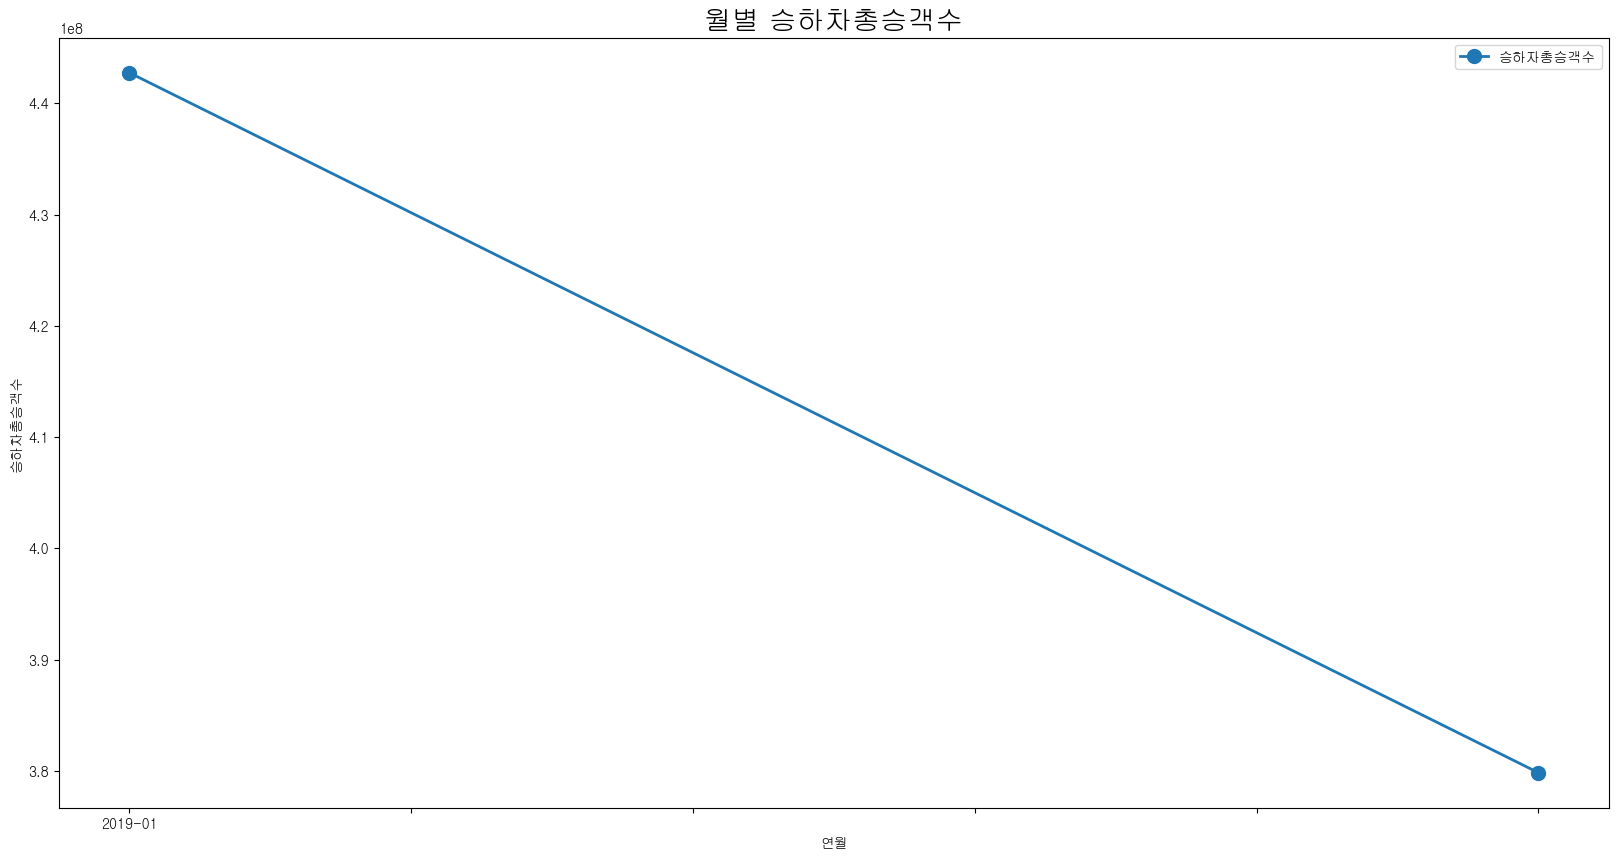

In [10]:
grouped=raw.groupby(['연월']).agg(승하자총승객수=('승하자총승객수','sum')).sort_values('연월',ascending=True)
grouped
# 그룹 출력
#for key,group in grouped:
#    print(key)
#    print(group.head())
grouped.plot(marker='o',figsize=(20,10),markersize=10,linewidth=2)
plt.title('월별 승하차총승객수',size=20)
plt.ylabel('승하차총승객수')

# 5월이 가장 많음

Text(0, 0.5, '승하차총승객수')

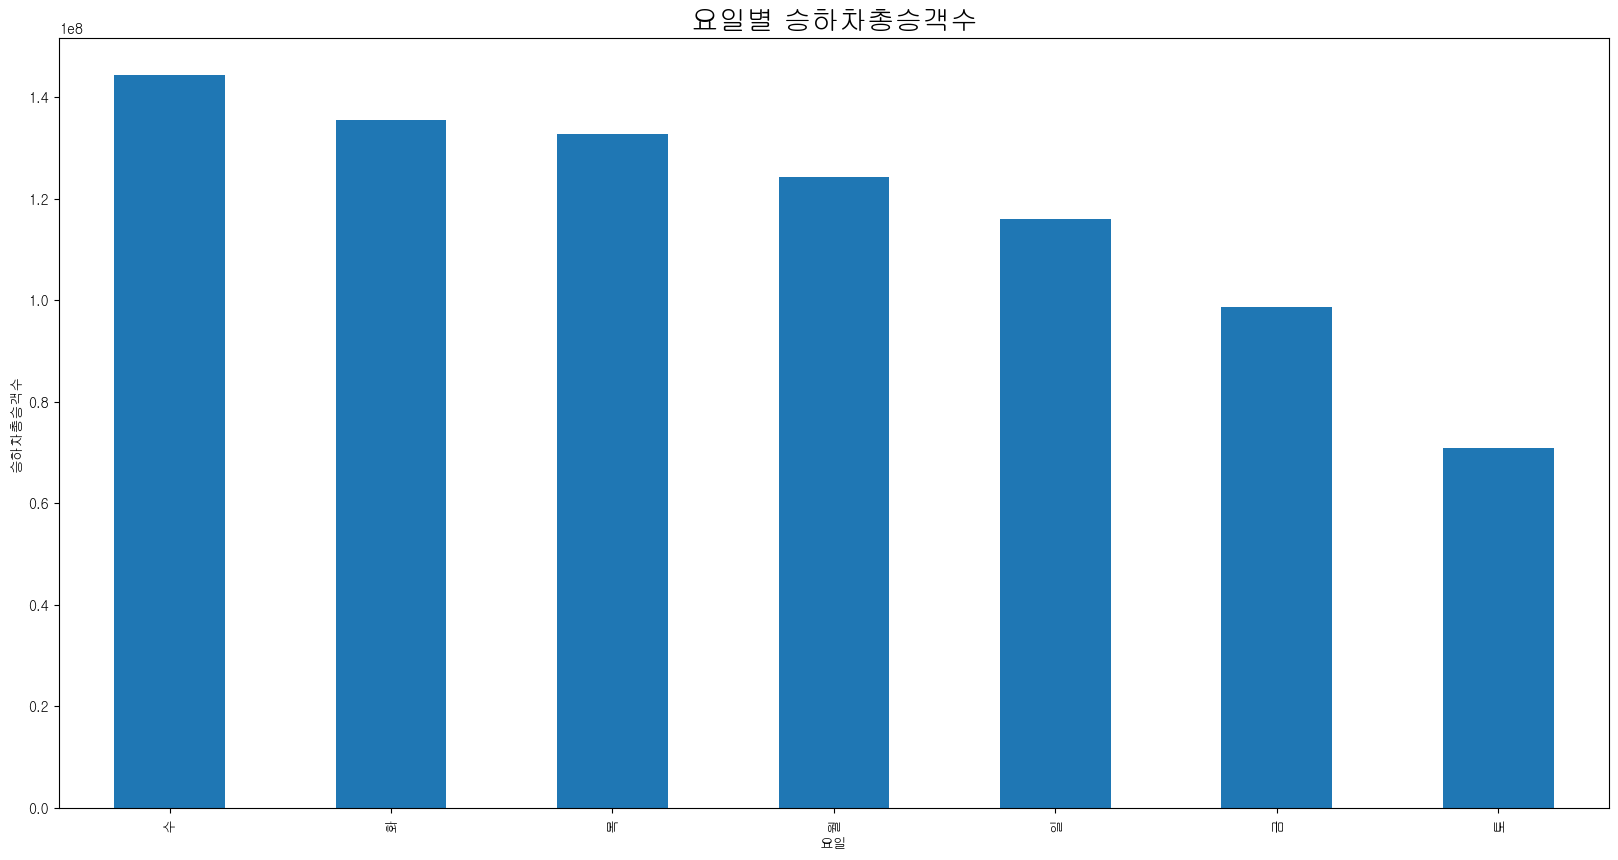

In [11]:
grouped2=raw.groupby(['요일']).sum().sort_values('승하자총승객수',ascending=False)
grouped2['승하자총승객수'].plot(kind='bar',figsize=(20,10),width=0.5)
# 목요일이 가장 많음
#raw['요일'].value_counts().plot(kind='bar',figsize=(20,10),width=0.7)
plt.title('요일별 승하차총승객수',size=20)
plt.ylabel('승하차총승객수')


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '02-19'),
  Text(0.0, 0, '01-01'),
  Text(10.0, 0, '01-11'),
  Text(20.0, 0, '01-21'),
  Text(30.0, 0, '01-31'),
  Text(40.0, 0, '02-10'),
  Text(50.0, 0, '02-20'),
  Text(60.0, 0, ''),
  Text(70.0, 0, '')])

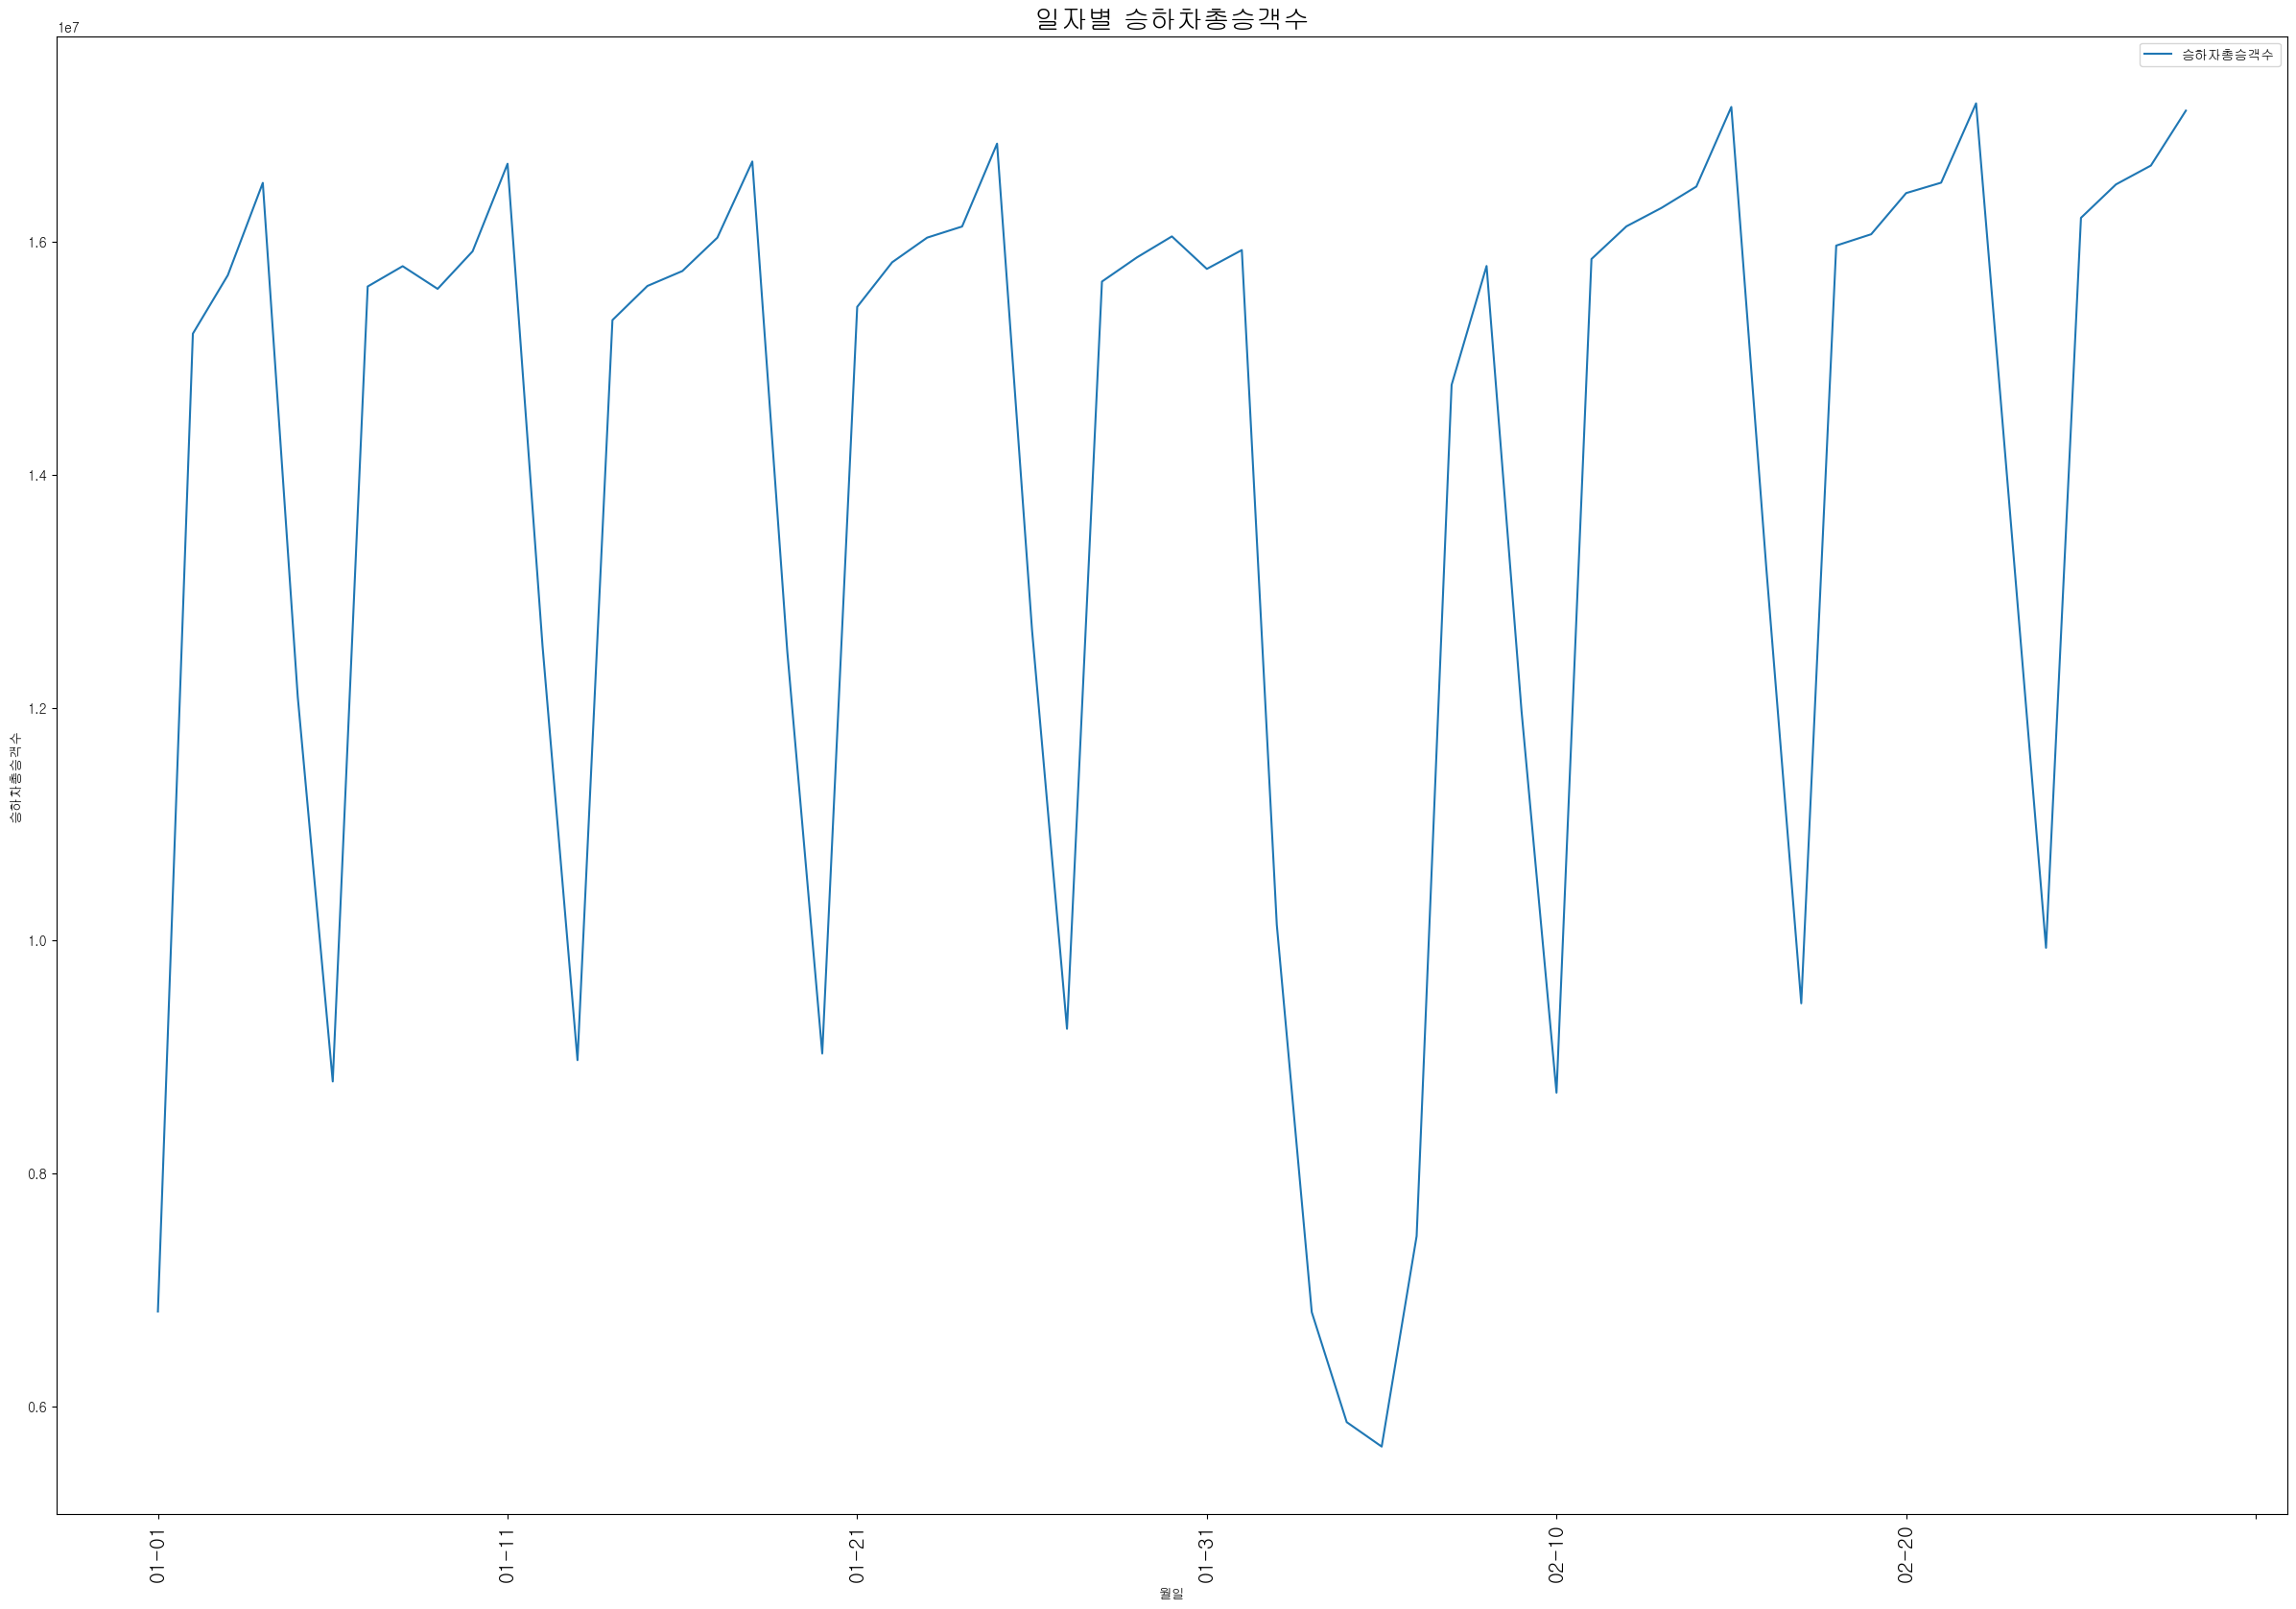

In [12]:
grouped4=raw.groupby(['월일']).agg(승하자총승객수=('승하자총승객수','sum'))
grouped4.plot(figsize=(30,20))
plt.title('일자별 승하차총승객수',size=20)
plt.ylabel('승하차총승객수')
plt.xticks(size=15,rotation=90)


In [13]:
# grouped5=raw.groupby(['역명'])
# grouped5=grouped5['승차총승객수'].sum()
# maxval4=grouped5.max()
# grouped5.loc[grouped5==maxval4]

grouped5=raw.groupby(['역명']).agg(승차총승객수=('승차총승객수','sum')).sort_values('승차총승객수',ascending=False)
grouped5.head()
# 잠실역이 가장 많음

,승차총승객수
역명,
강남,6076904.0
잠실,5899086.0
고속터미널,5632346.0
홍대입구,5485979.0
서울역,5388905.0


In [14]:
grouped6=raw.groupby(['역명']).agg(하차총승객수=('하차총승객수','sum')).sort_values('하차총승객수',ascending=False)
grouped6.head()
# 강남역이 제일 많음

,하차총승객수
역명,
강남,6166337.0
홍대입구,5830241.0
잠실,5805666.0
고속터미널,5687345.0
서울역,5337967.0


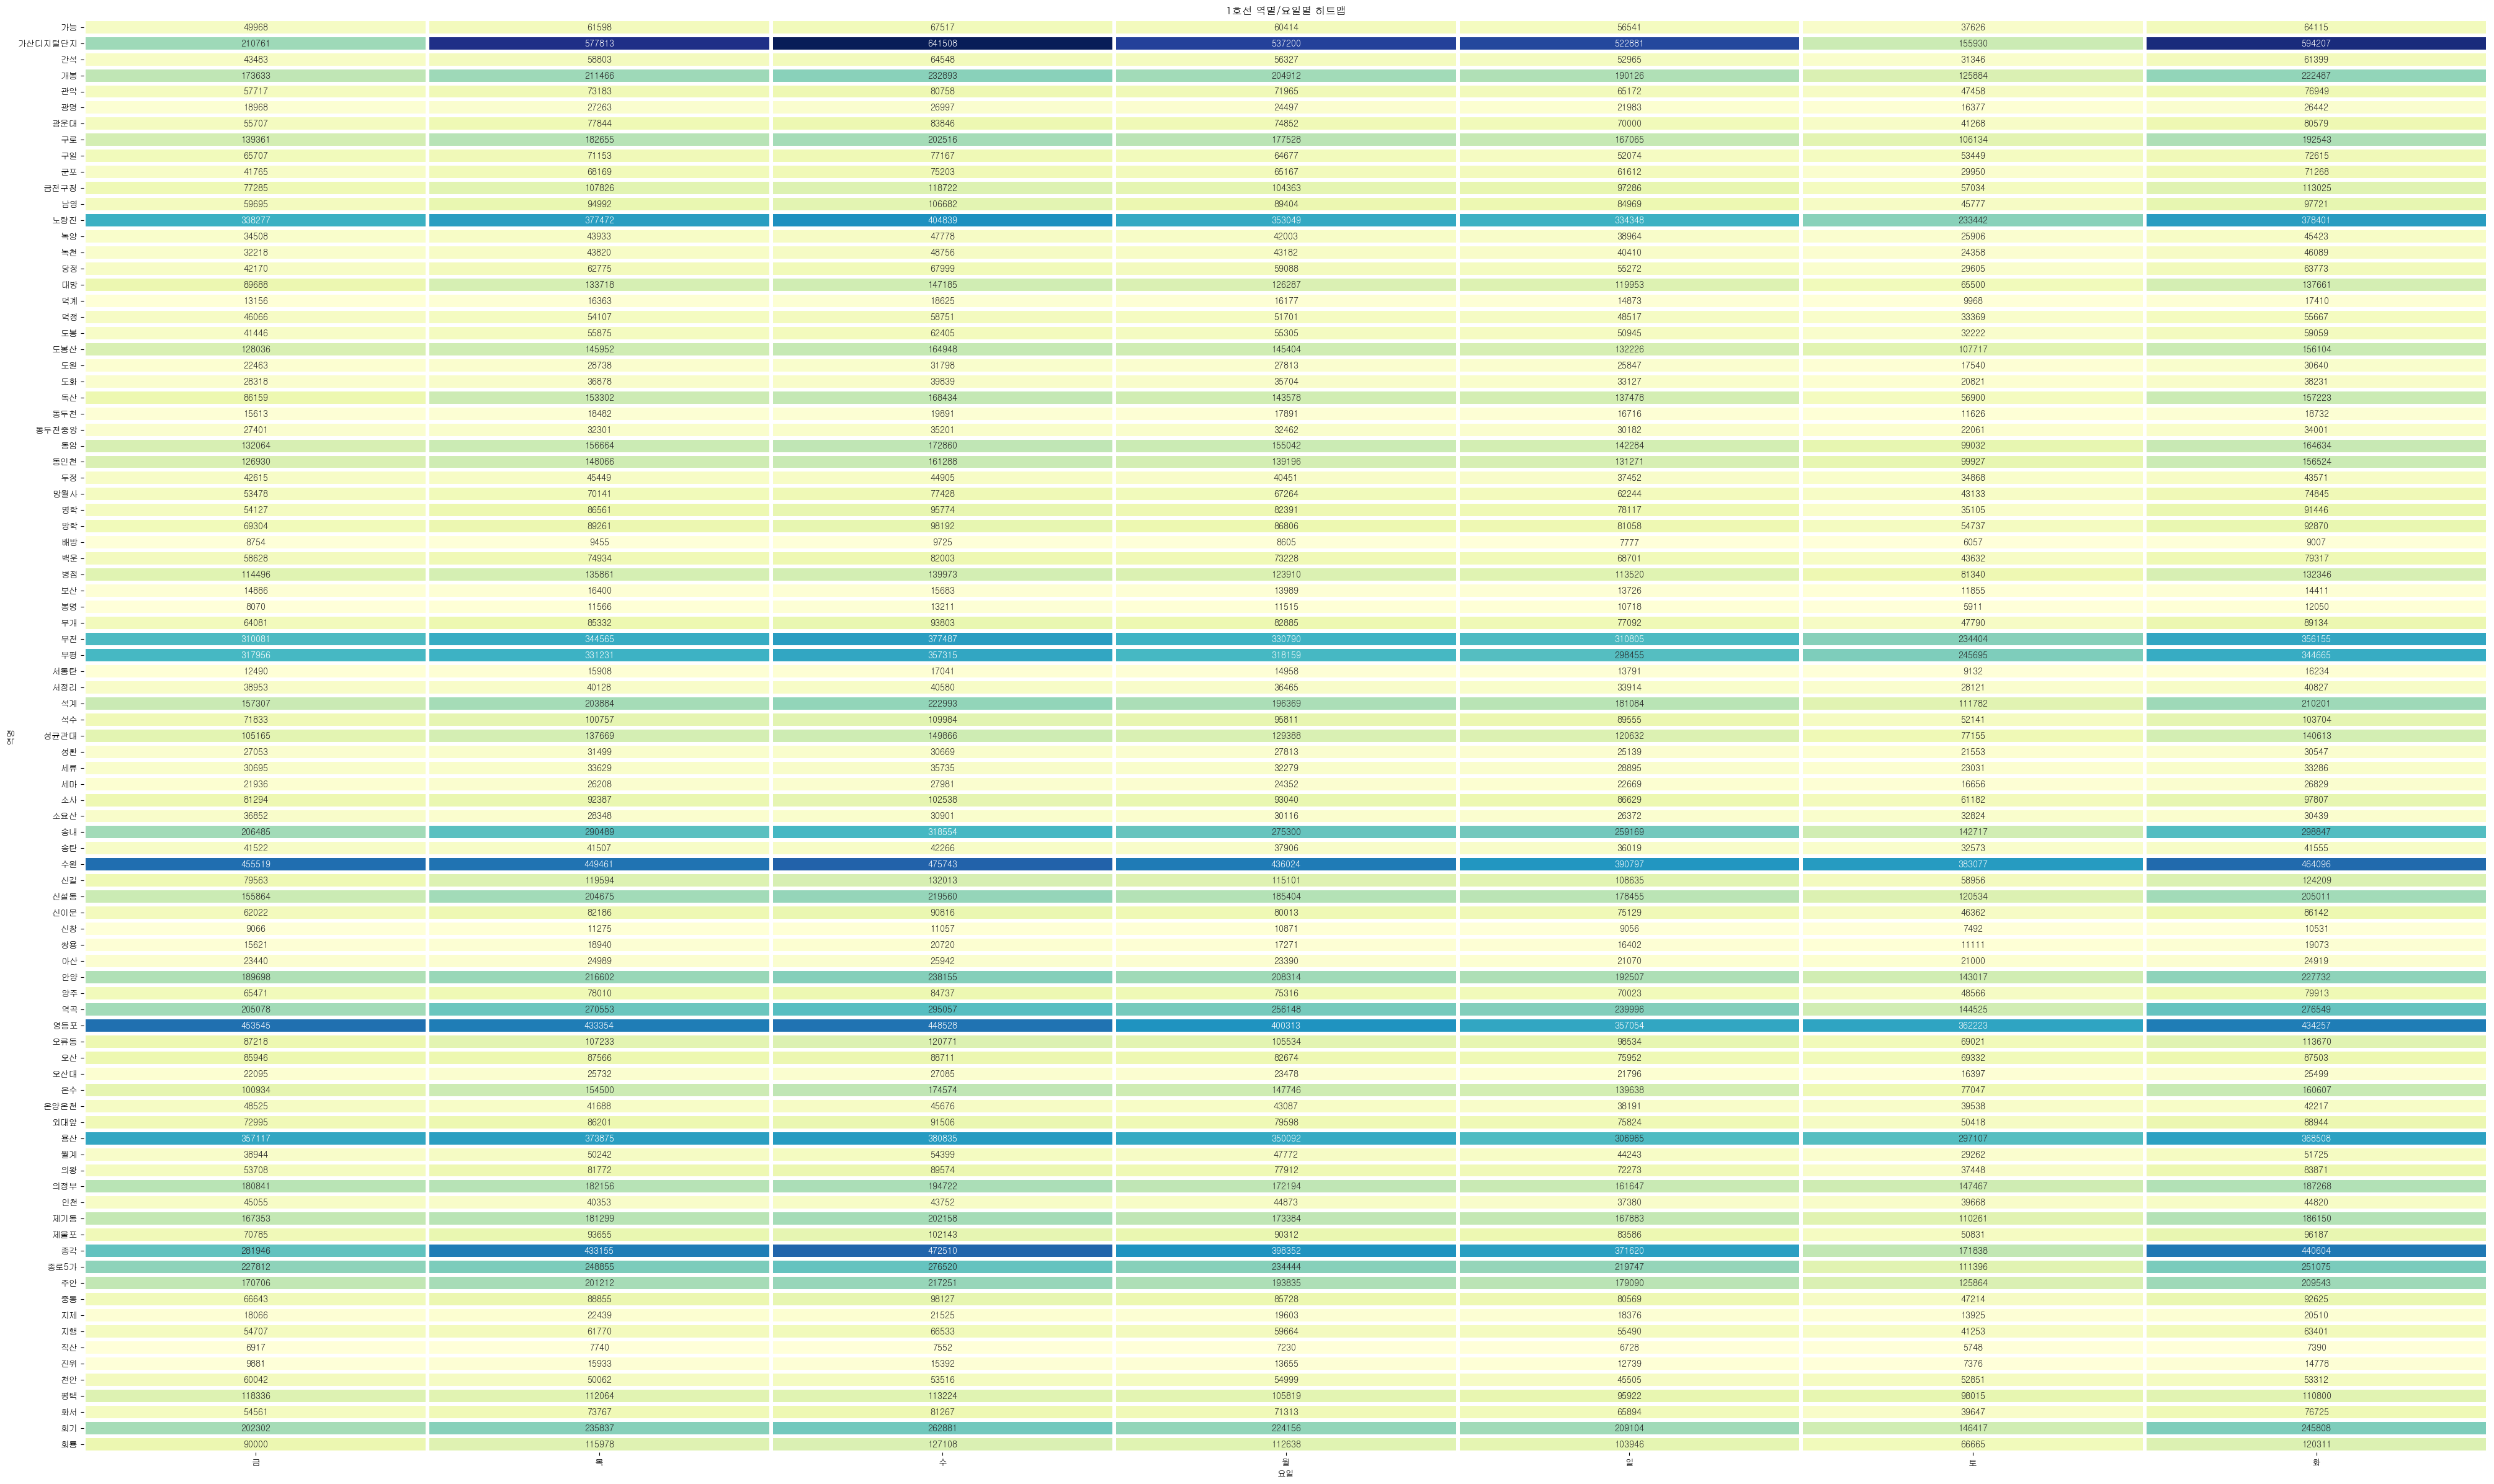

In [15]:
raw['승차총승객수']=raw['승차총승객수'].astype('int64')
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('1호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(50,30))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('1호선 역별/요일별 히트맵')
plt.show()

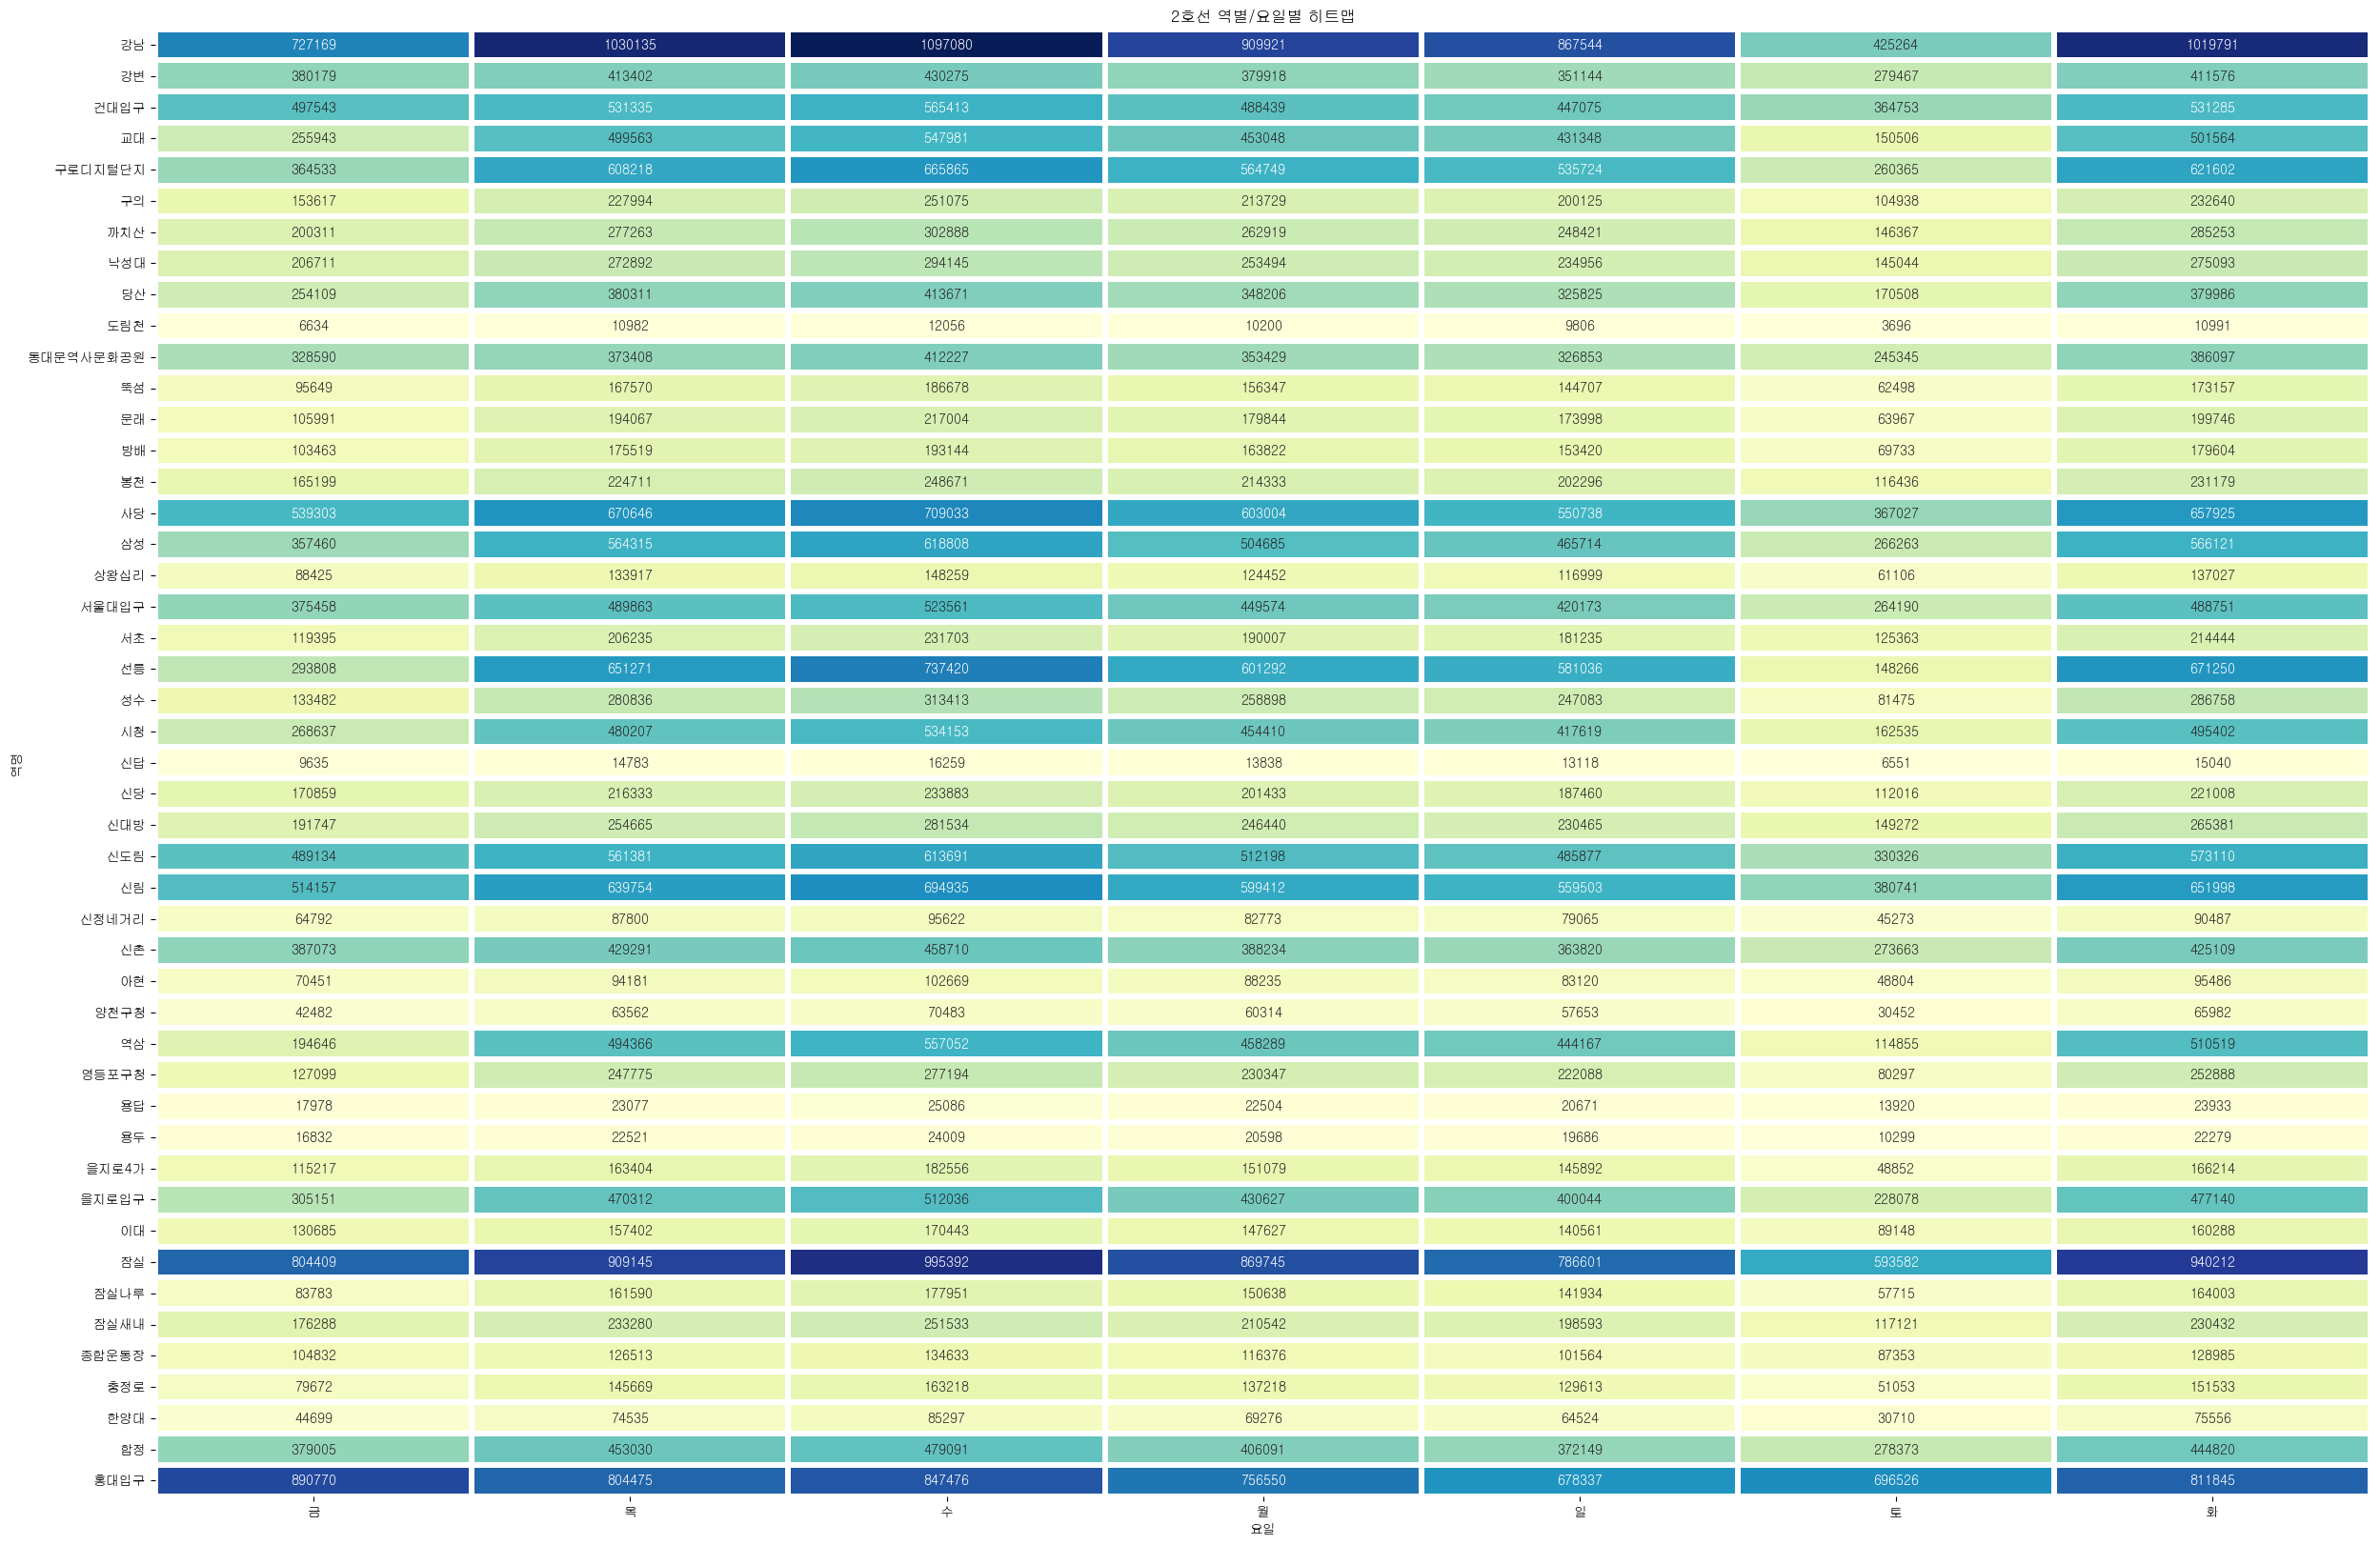

In [16]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('2호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('2호선 역별/요일별 히트맵')
plt.show()

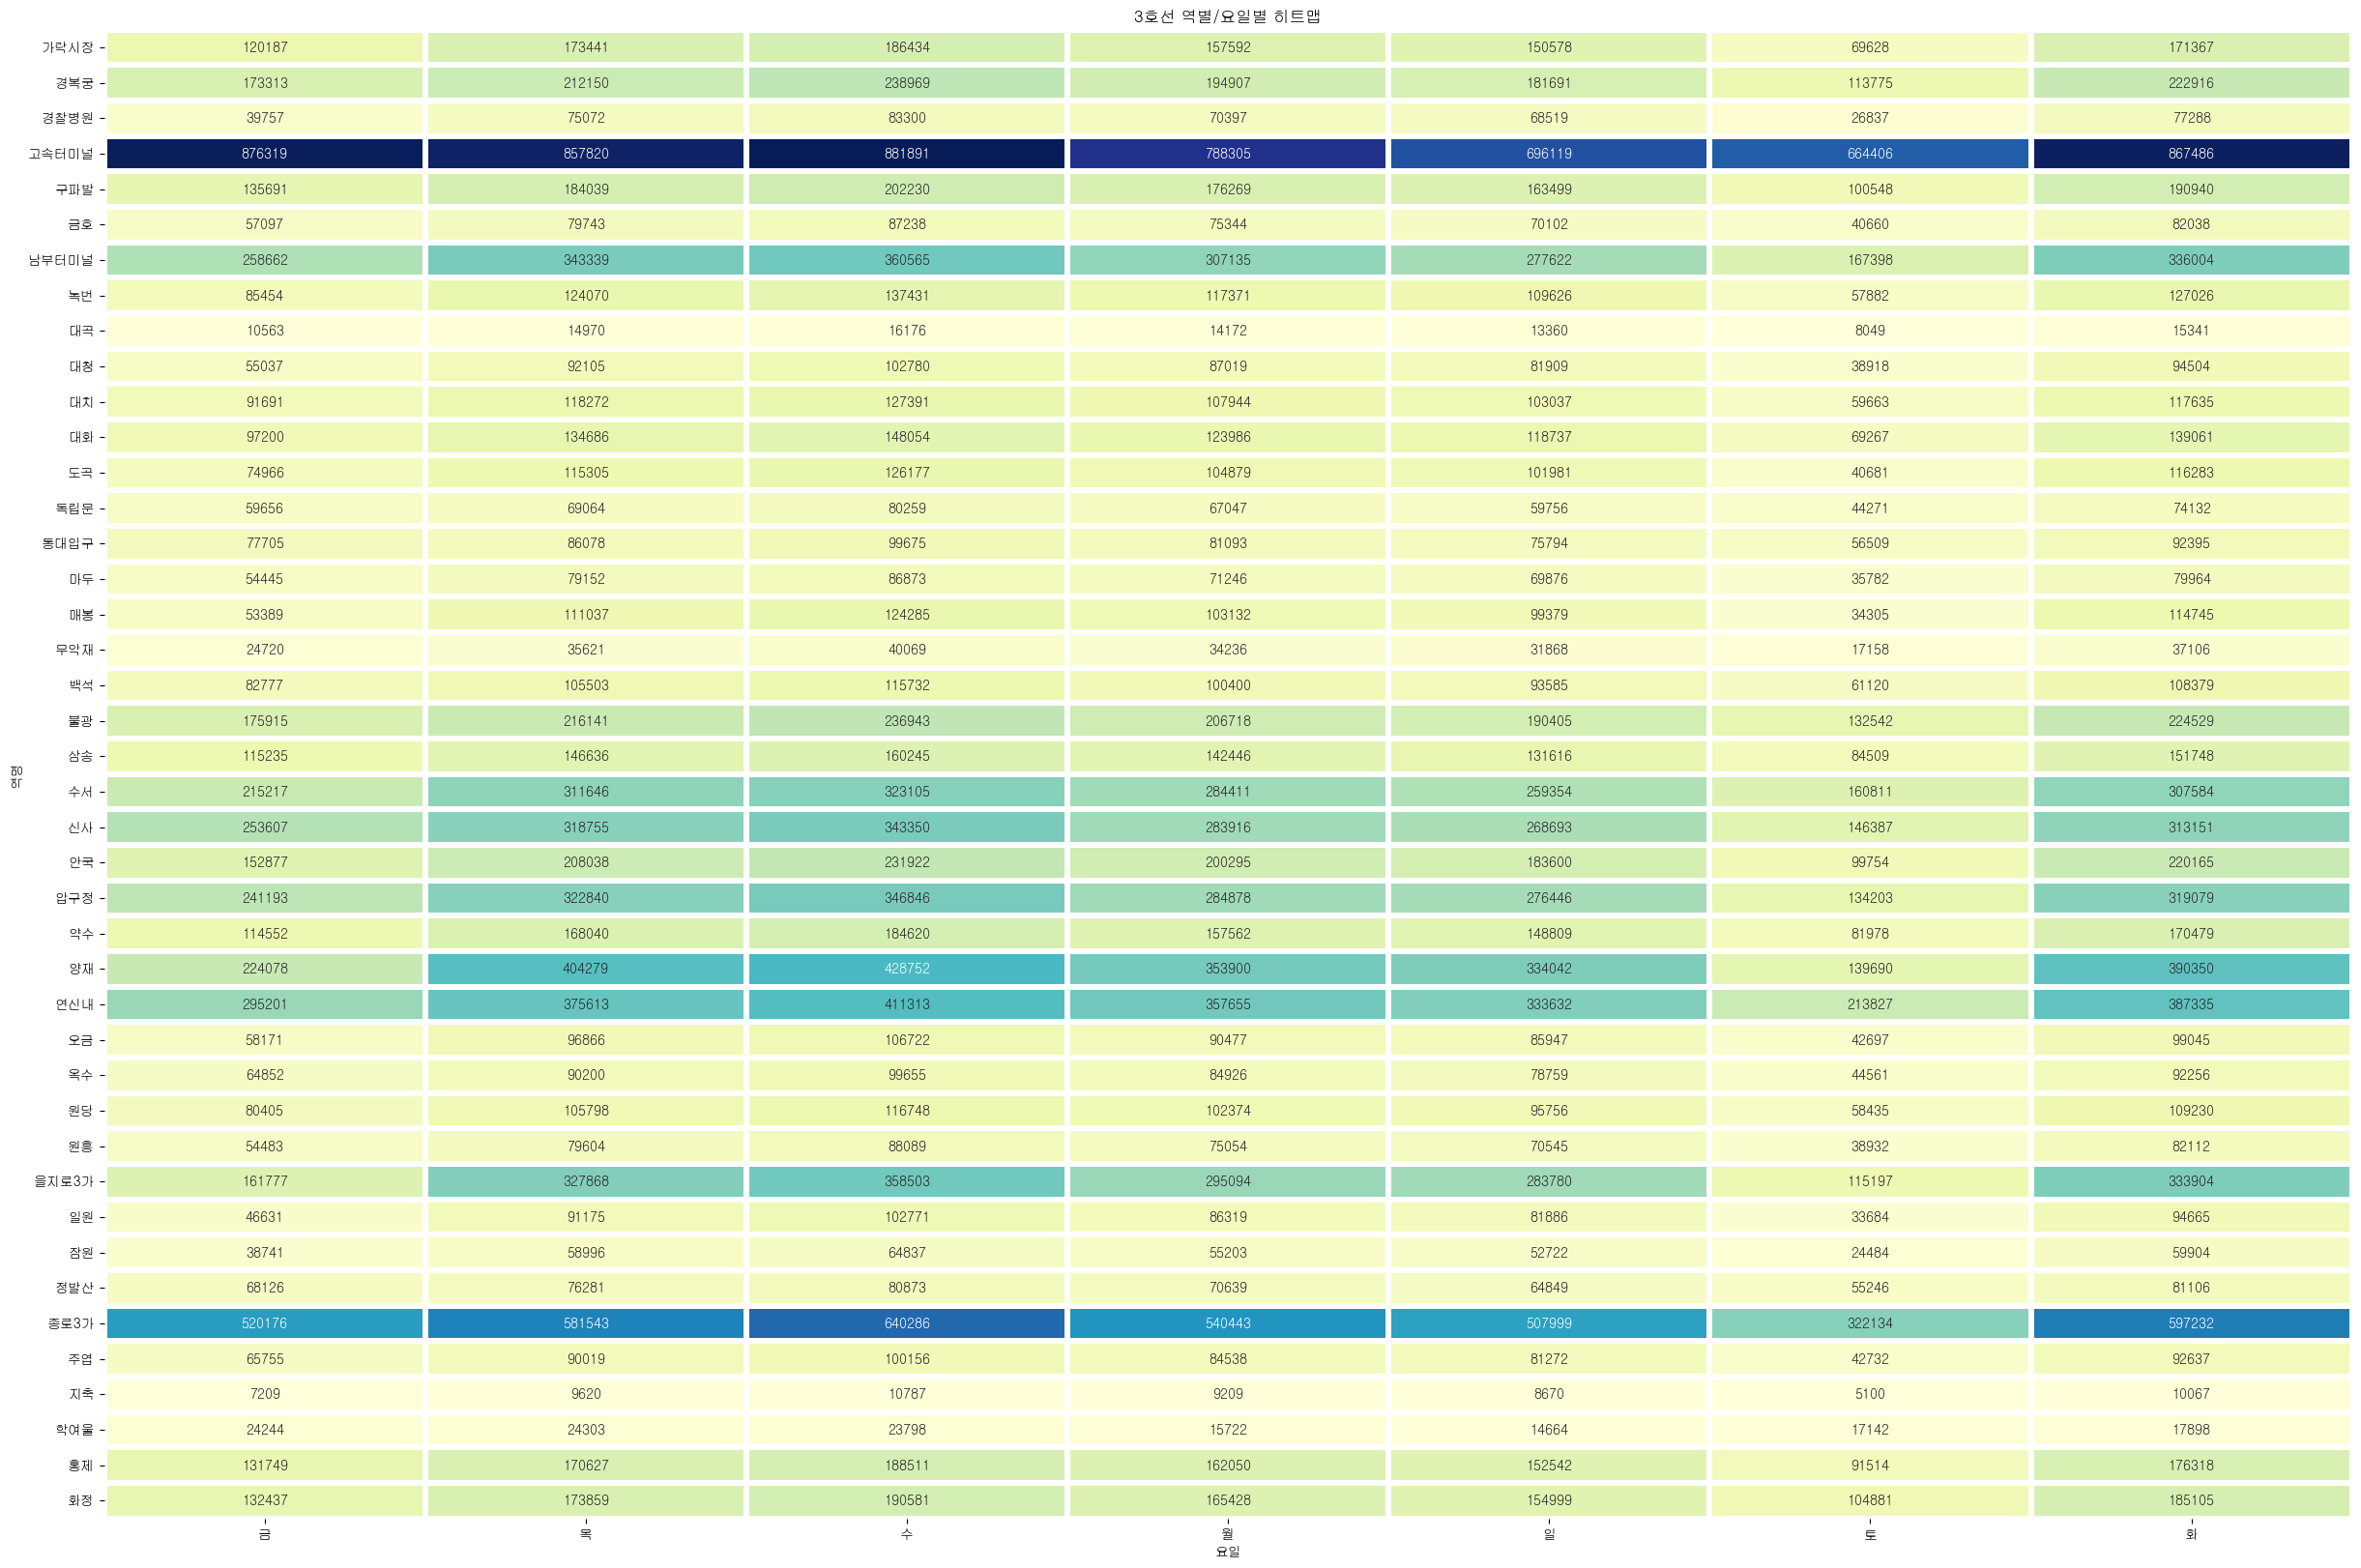

In [17]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('3호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('3호선 역별/요일별 히트맵')
plt.show()

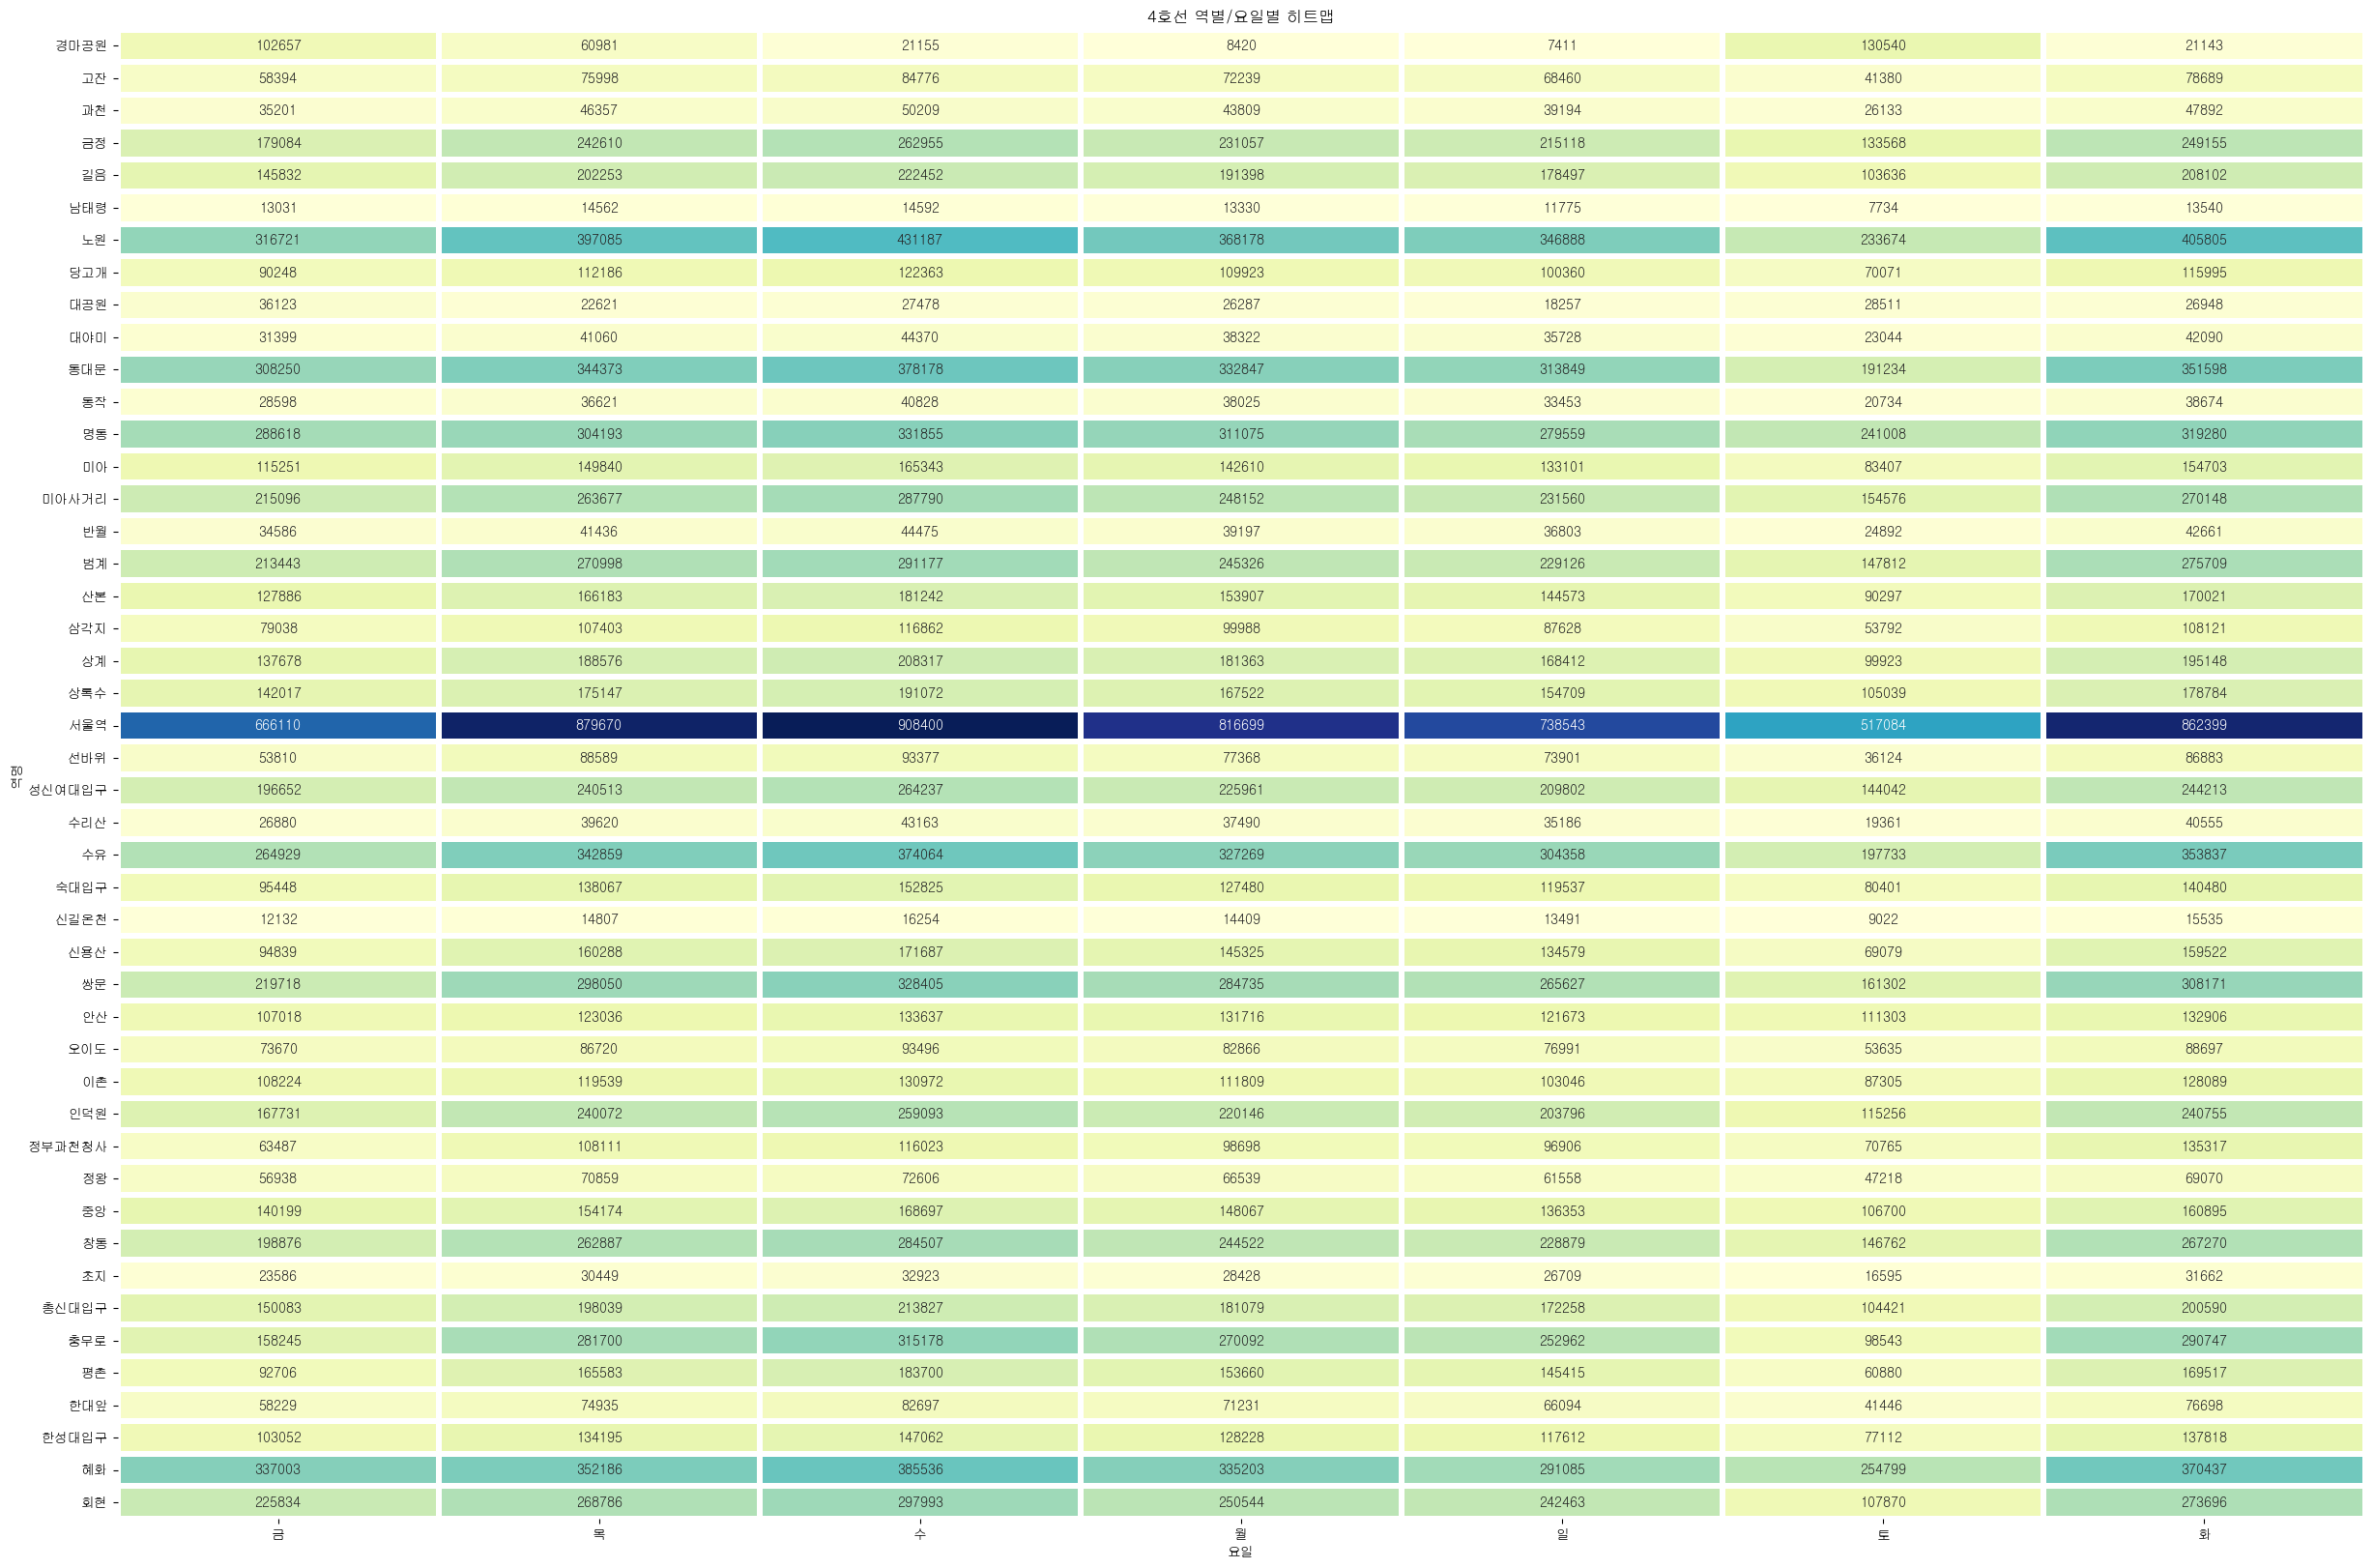

In [18]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('4호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('4호선 역별/요일별 히트맵')
plt.show()

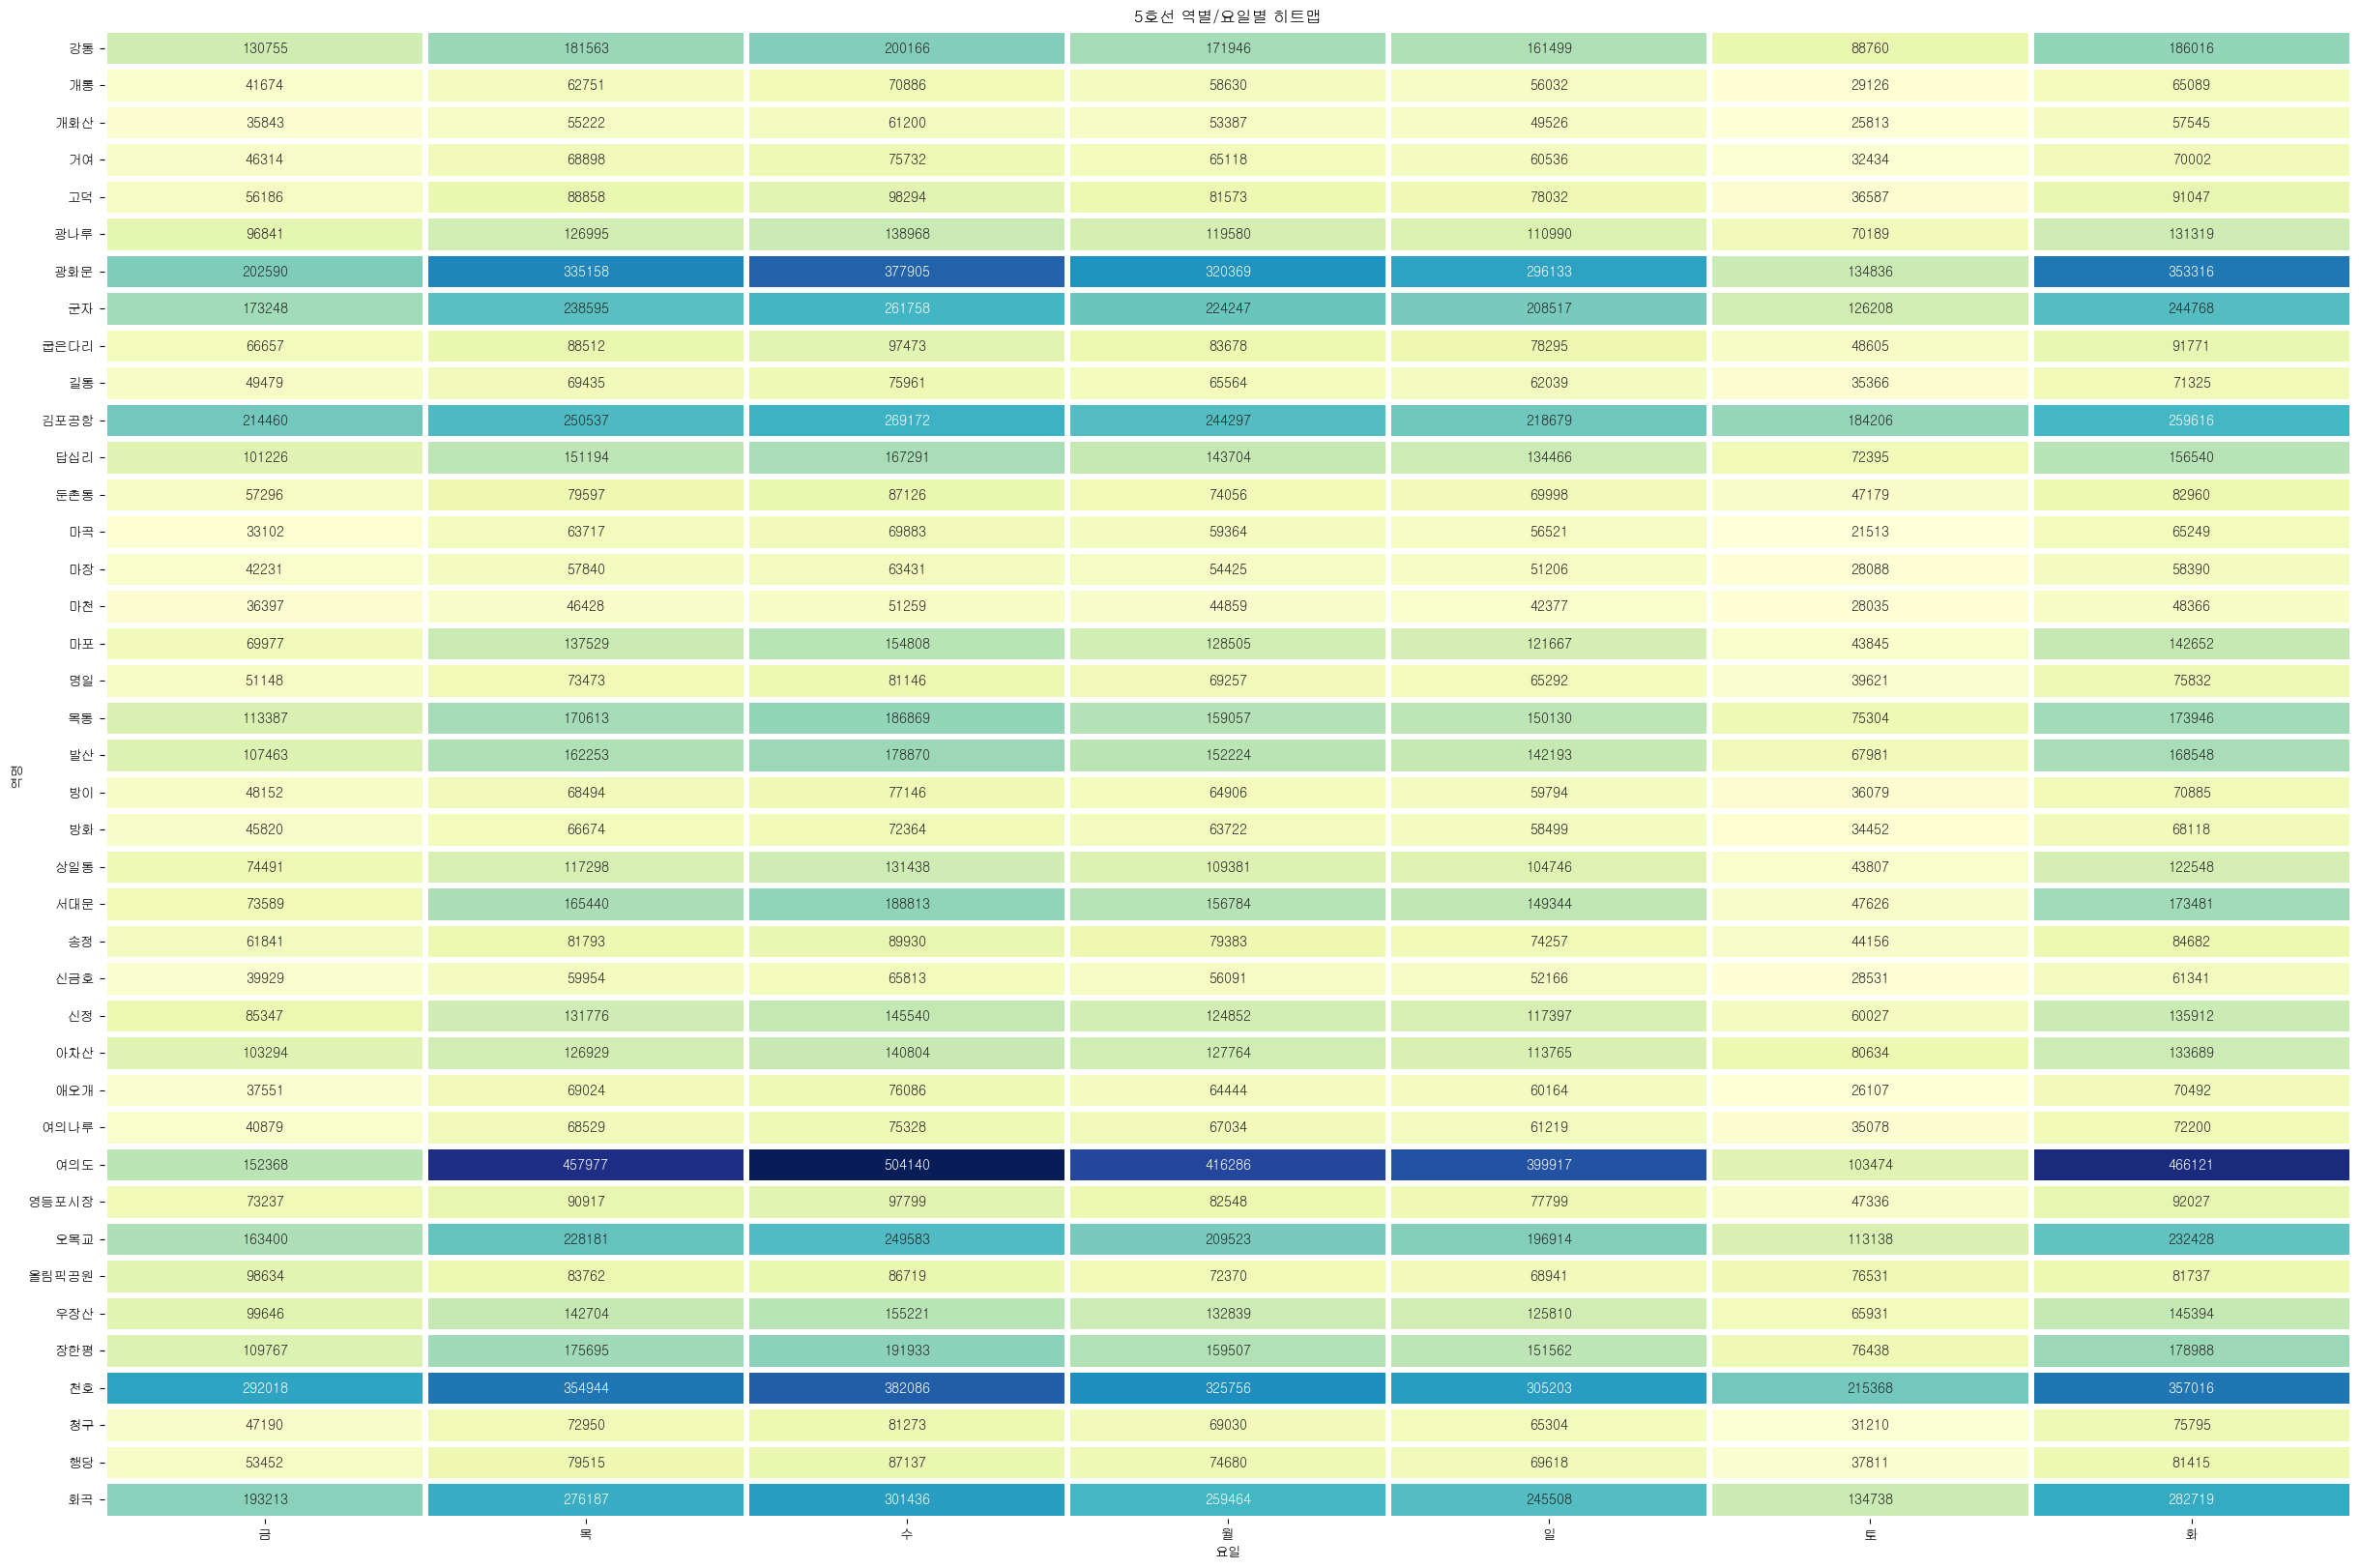

In [19]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('5호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('5호선 역별/요일별 히트맵')
plt.show()

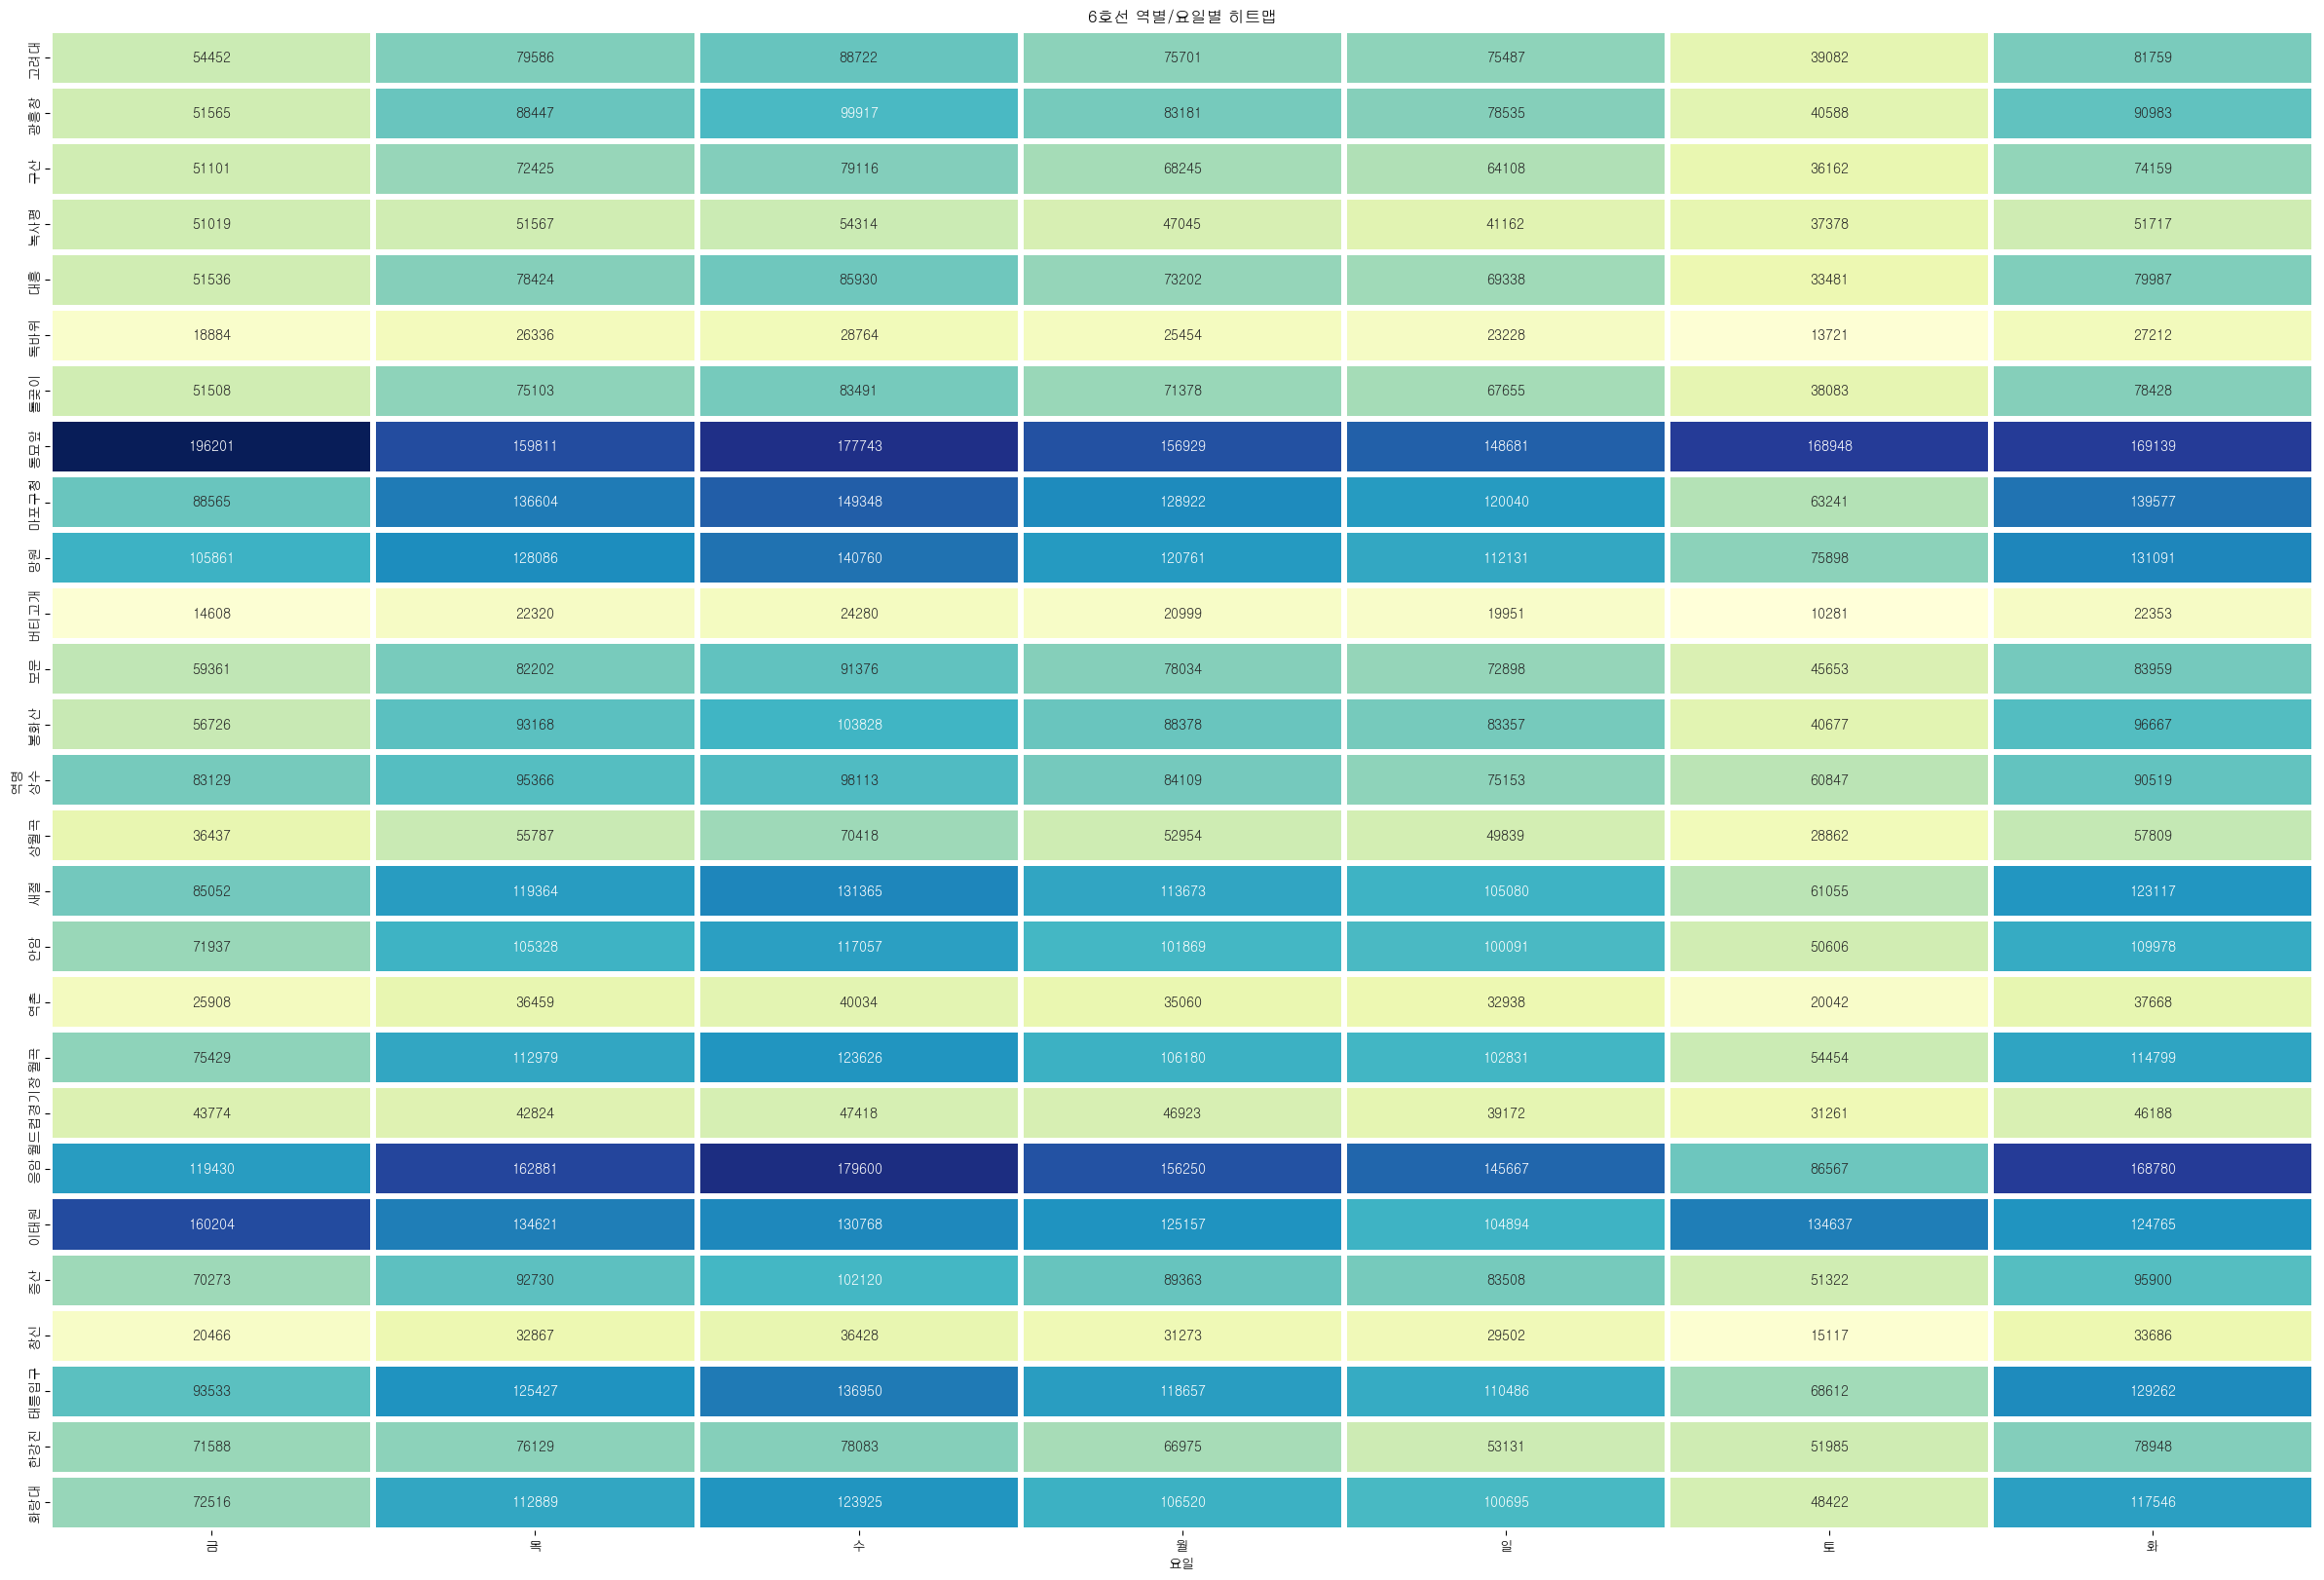

In [20]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('6호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('6호선 역별/요일별 히트맵')
plt.show()

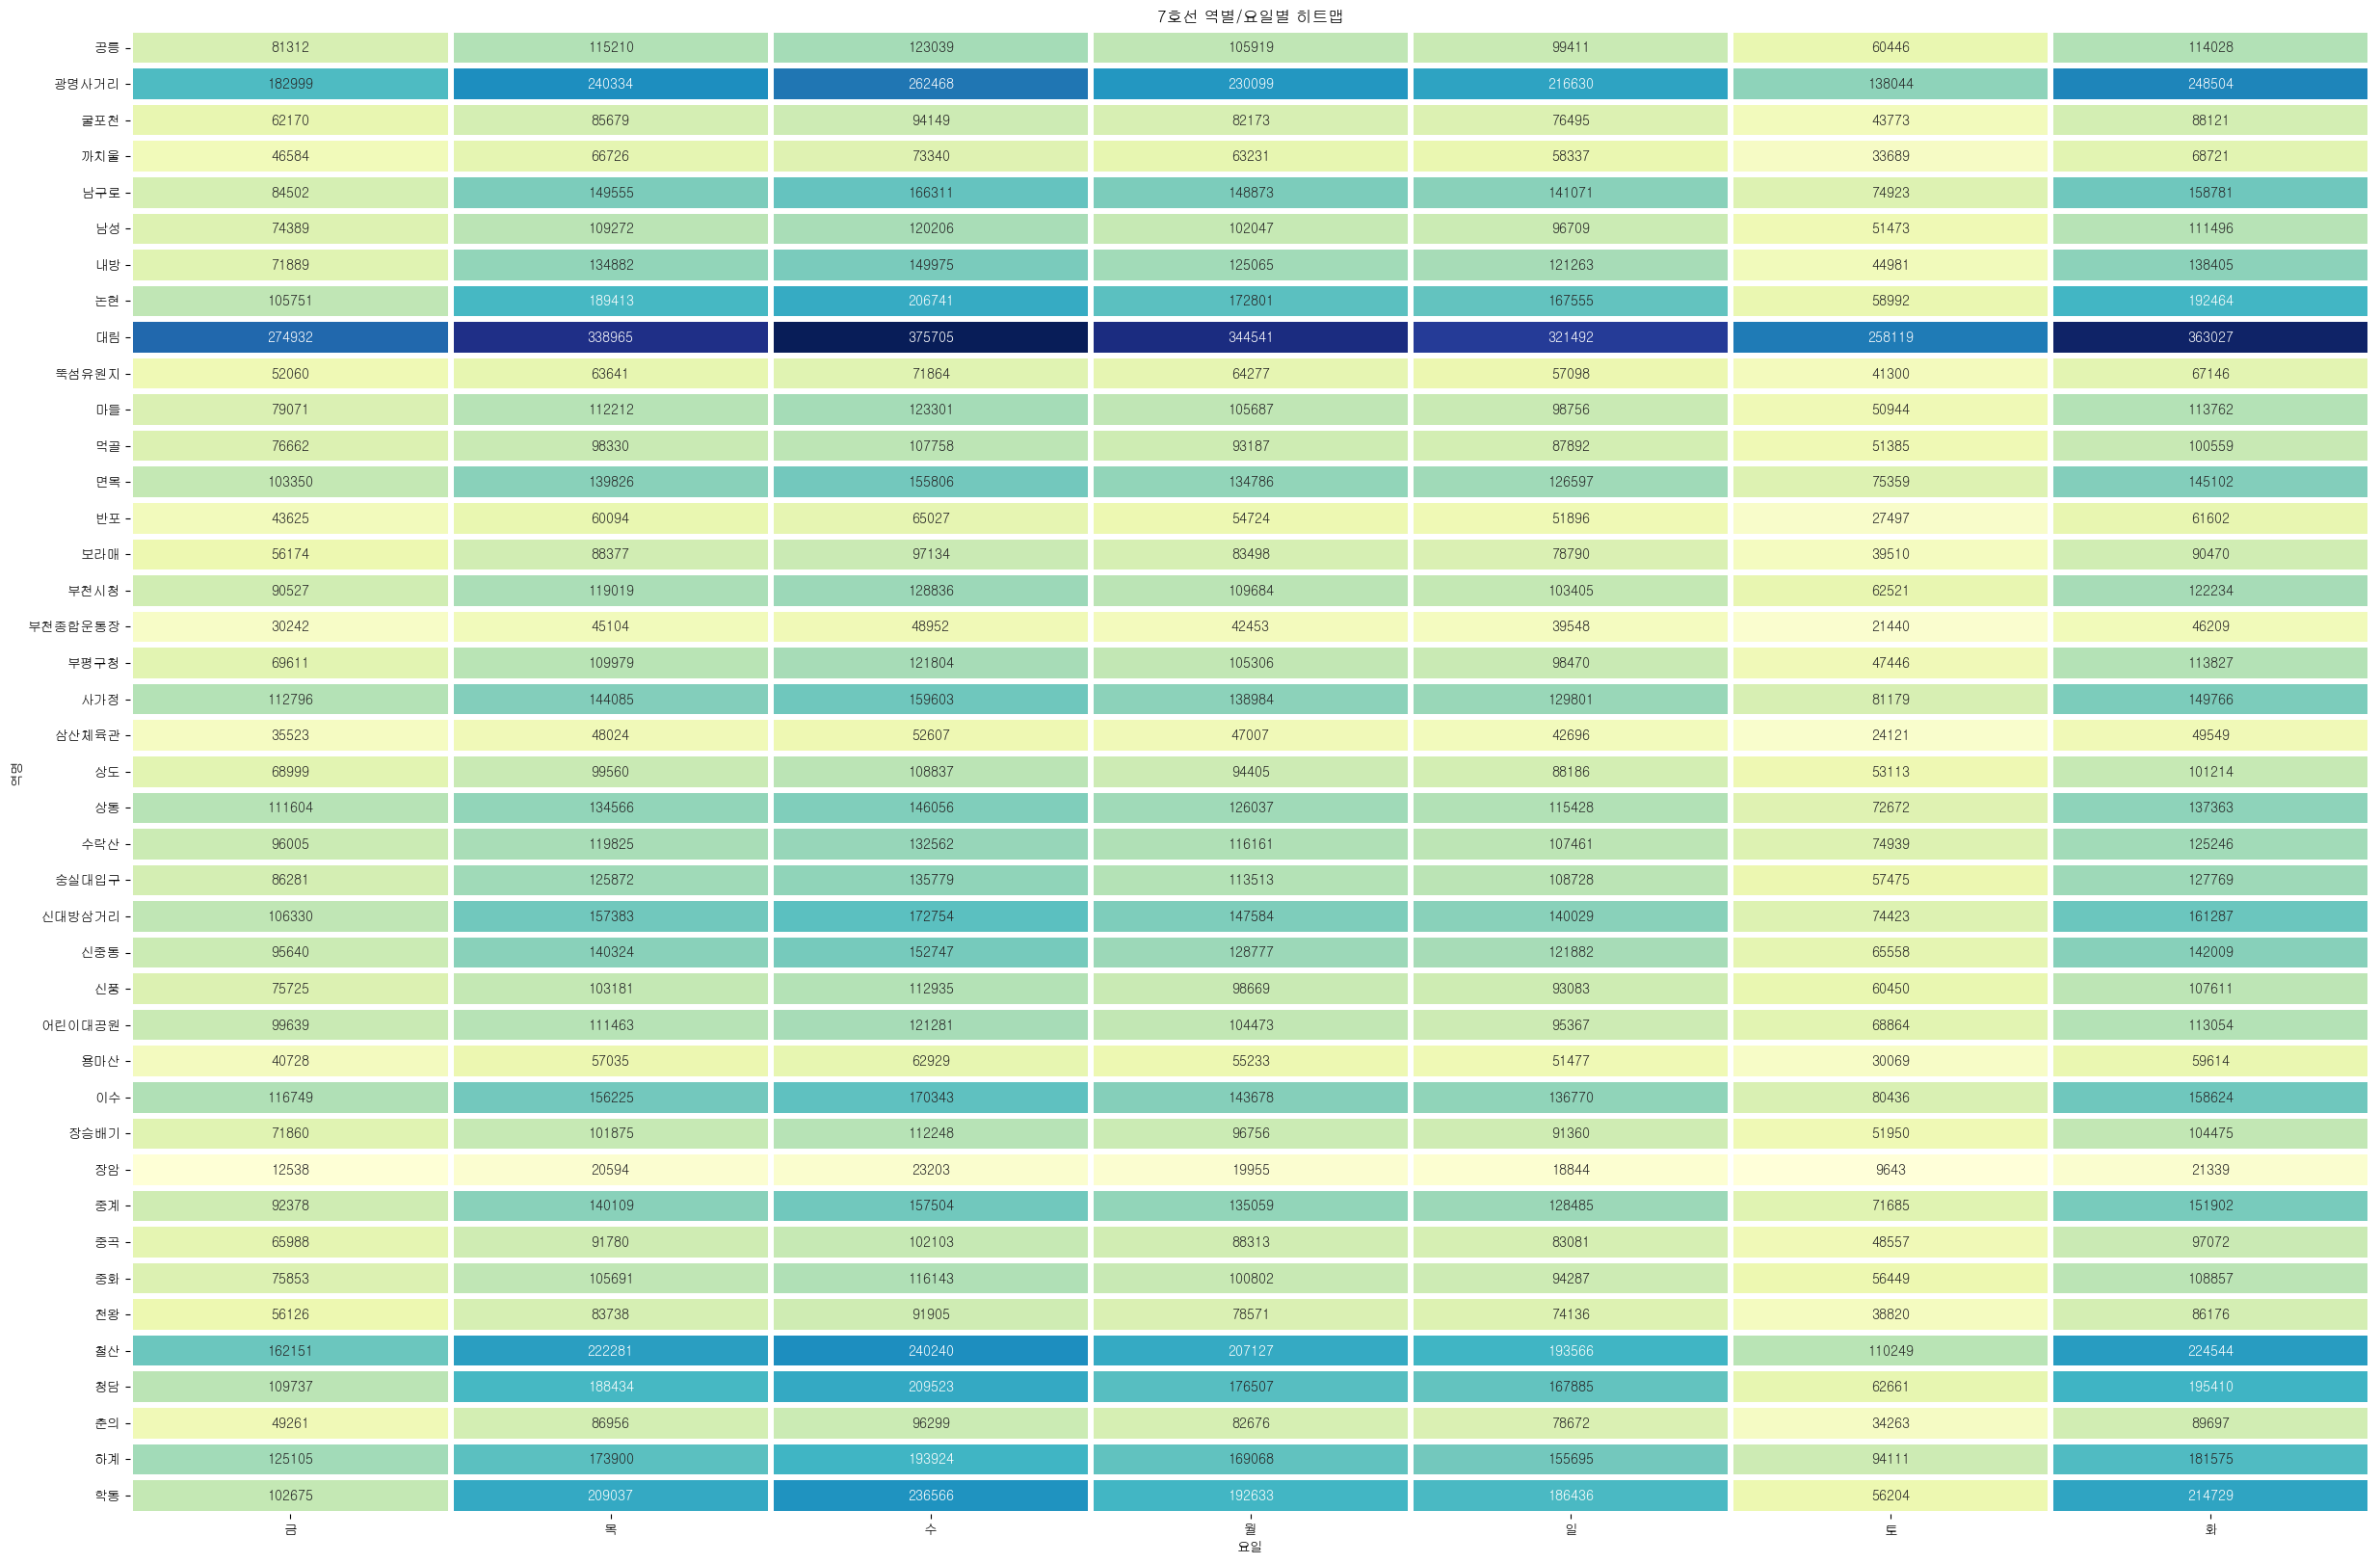

In [21]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('7호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('7호선 역별/요일별 히트맵')
plt.show()

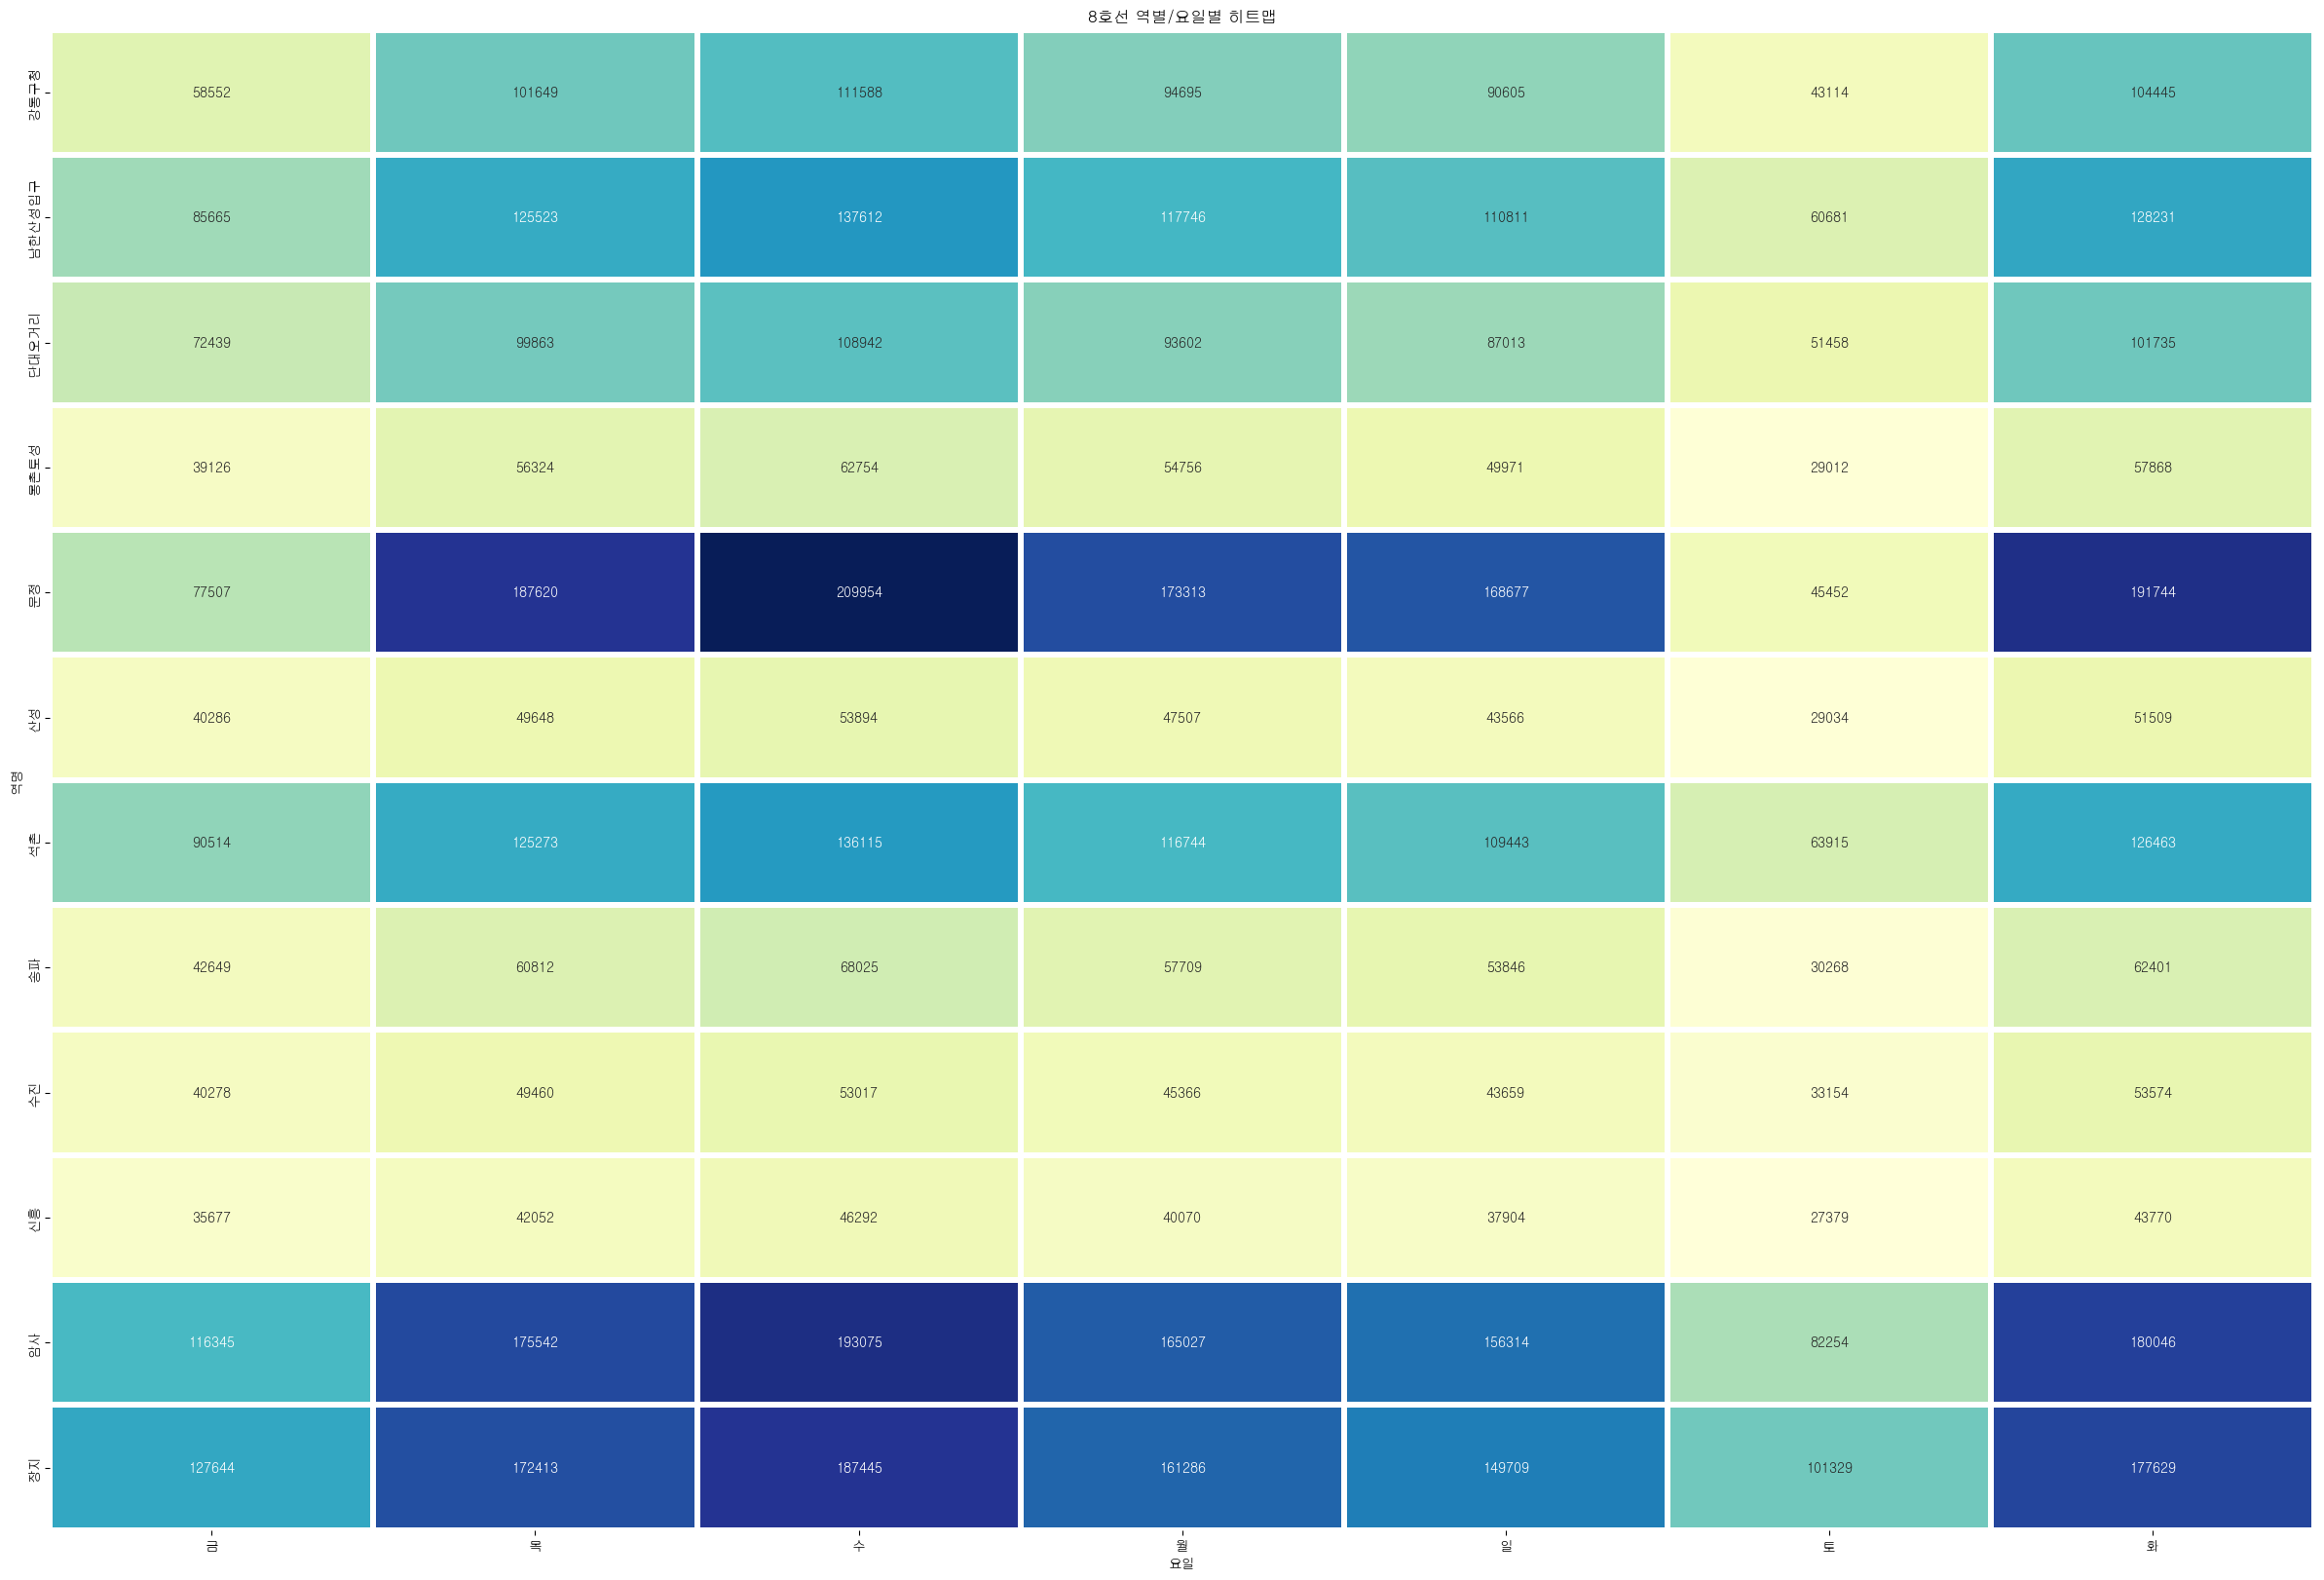

In [22]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('8호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('8호선 역별/요일별 히트맵')
plt.show()

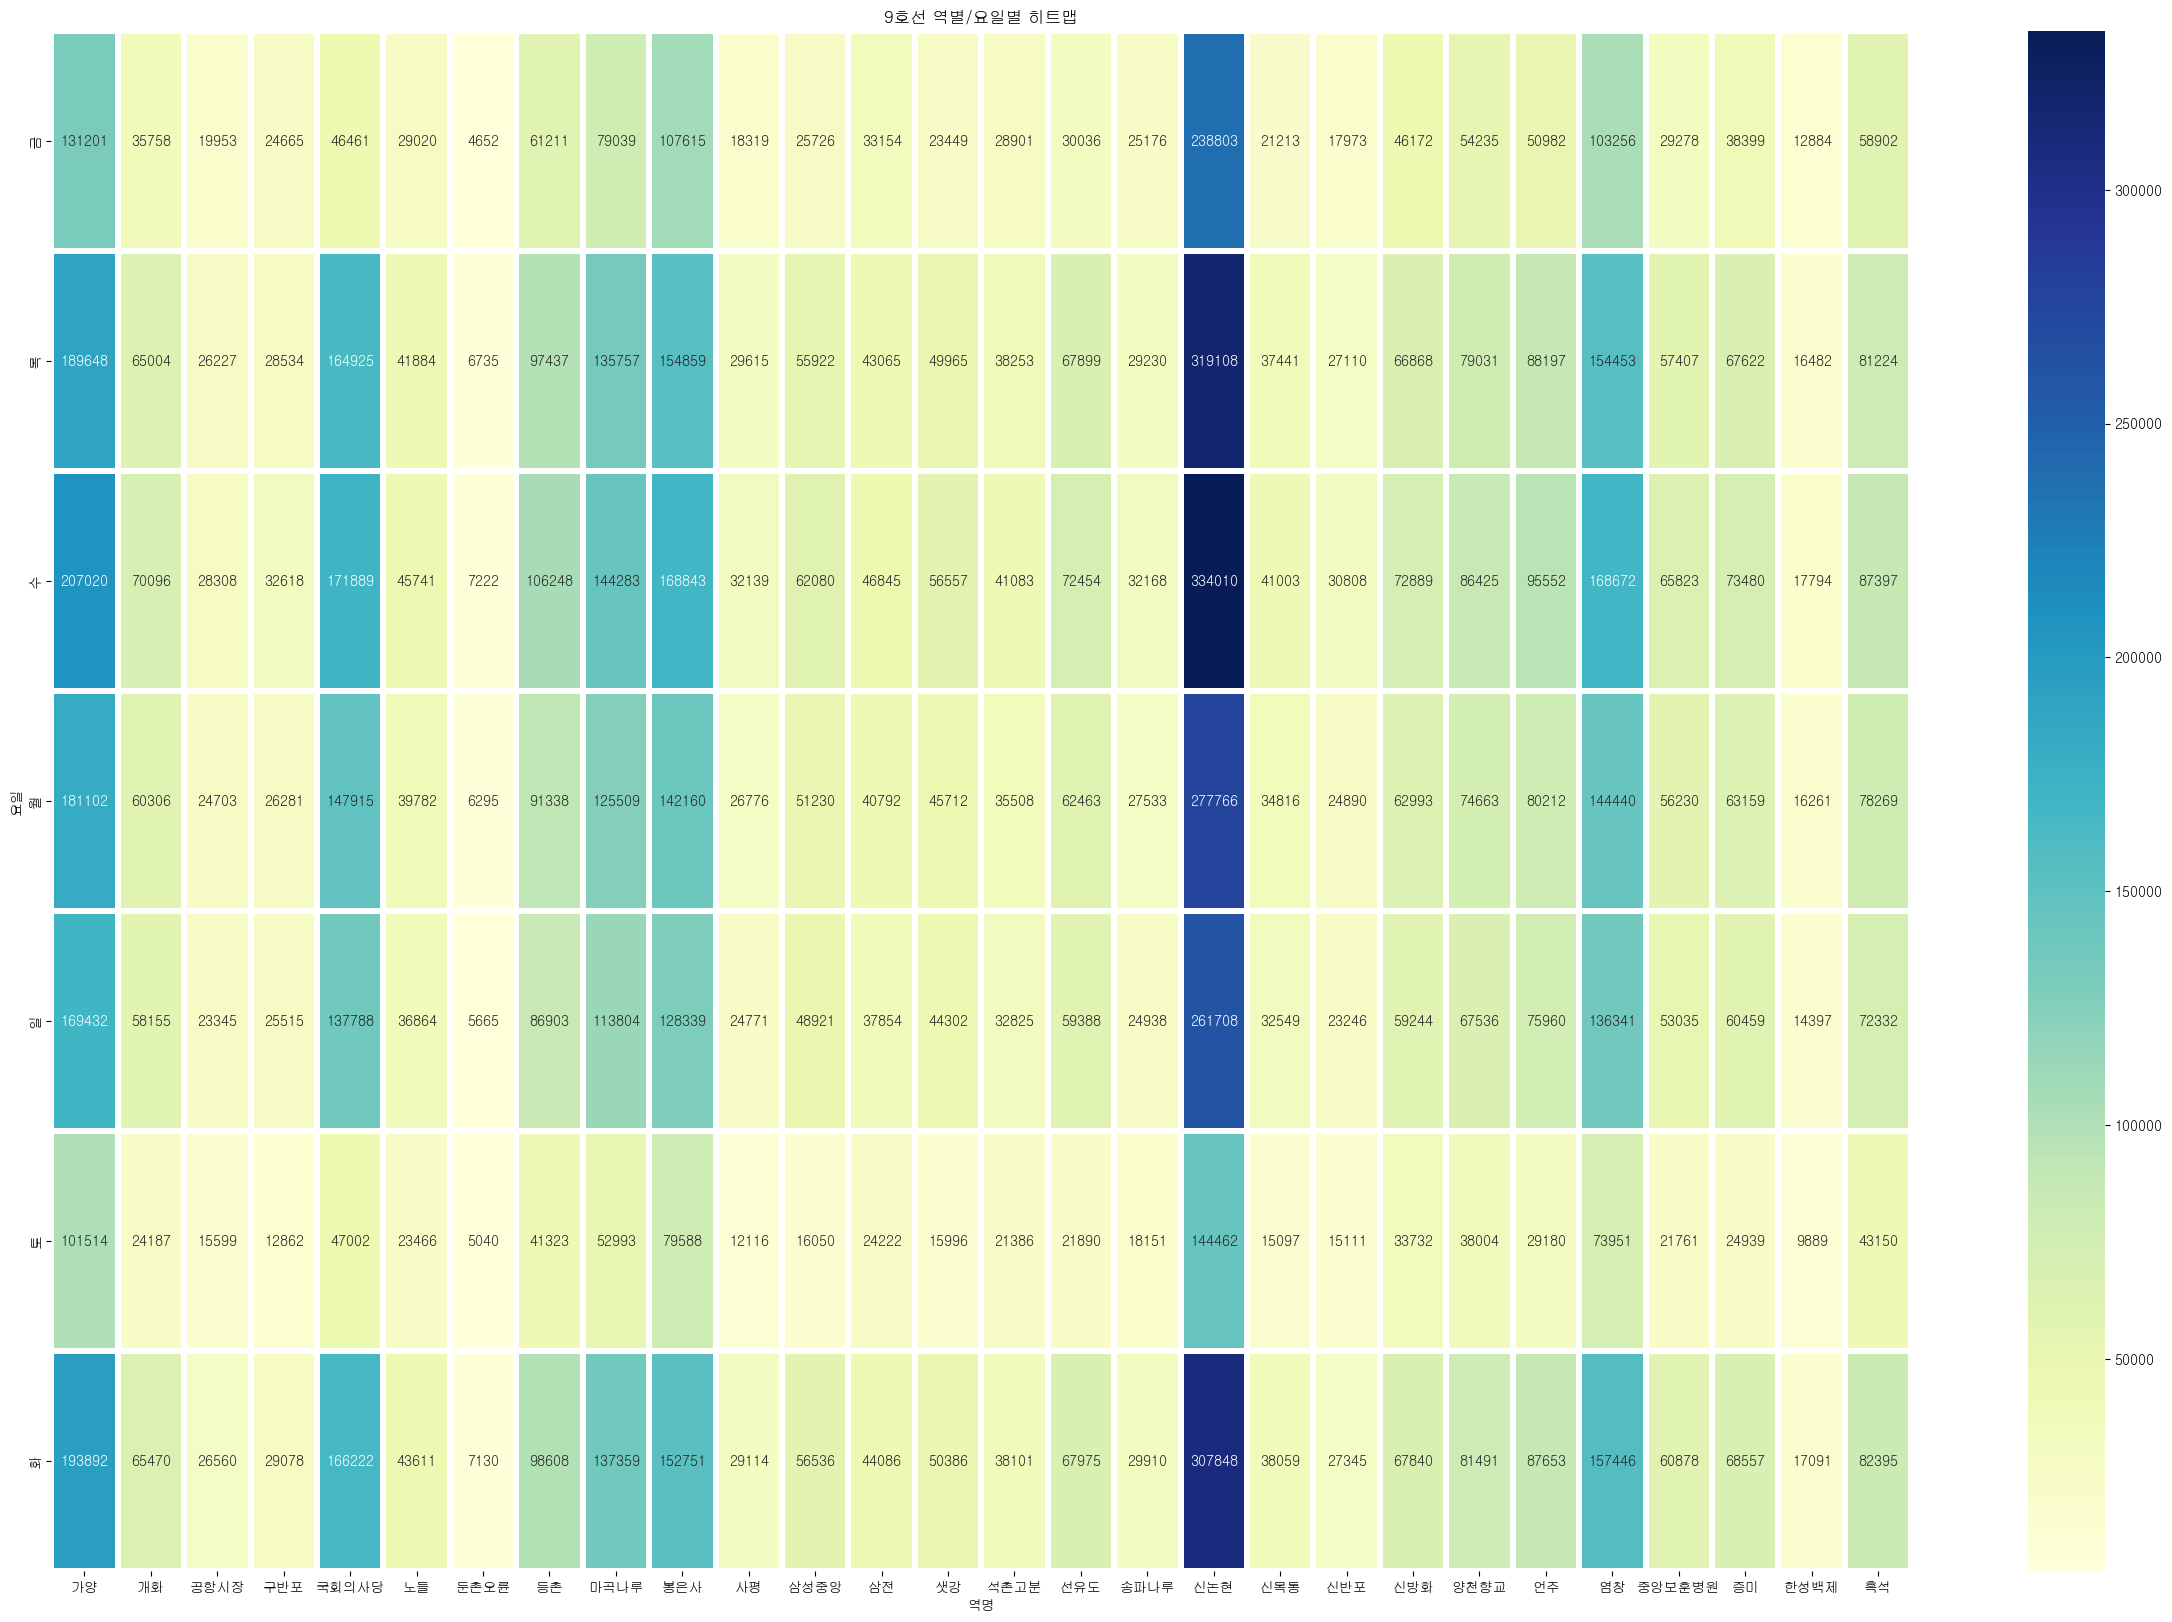

In [23]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('9호선')
table=pd.pivot_table(group1,index='요일',columns='역명',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=True)
plt.title('9호선 역별/요일별 히트맵')
plt.show()

In [24]:
import folium
file2='./지하철노선위경도정보2.csv'
df=pd.read_csv(file2)
df1=df.groupby(['호선','역지역'])
df2=df1.get_group(('2호선','수도권'))
df.head()

,역이름,역지역,위도,경도,호선
0,낙성대,수도권,37.477090,126.963506,2호선
1,구룡,수도권,37.487027,127.059475,분당선
2,서울대입구,수도권,37.481285,126.952695,2호선
3,불광,수도권,37.610044,126.930302,3호선
4,월롱,수도권,37.796204,126.792563,경의선


In [25]:
a=raw.groupby(['역명']).agg(승차총승객수=('승차총승객수','sum'))
a

,승차총승객수
역명,
4.19민주묘지,147446
가능,397779
가락시장,1029227
가산디지털단지,3240300
가양,1173809
...,...
회기,1526505
회룡,736646
회현,1667186


In [26]:
adf2=pd.merge(a,df2,how='inner',left_on='역명',right_on='역이름')
adf2.set_index('역이름',inplace=True)
adf2.head()




,승차총승객수,역지역,위도,경도,호선
역이름,,,,,
강남,6076904,수도권,37.498085,127.027978,2호선
강변,2645961,수도권,37.535118,127.094723,2호선
건대입구,3425843,수도권,37.540398,127.069203,2호선
교대,2839953,수도권,37.492736,127.013863,2호선
구로디지털단지,3621056,수도권,37.485253,126.901473,2호선


In [27]:
subway_map=folium.Map(location=[37.5,126.8],tiles='Stamen Terrain',zoom_start=20)
for name,lat,lng,num in zip(adf2.index,adf2.위도,adf2.경도,adf2.승차총승객수):
    folium.CircleMarker([lat,lng],radius=num/800000,fill=True).add_to(subway_map)
    folium.Marker([lat,lng],popup=name).add_to(subway_map)
subway_map.save('./subway_map.html')